In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
policy = pd.read_csv("C:\\Users\\n0369076\\Desktop\\New Propensity data\\PolicyExtract.txt", sep=',', lineterminator='\r', error_bad_lines=False)
policy.shape

b'Skipping line 2584764: expected 37 fields, saw 38\nSkipping line 2584765: expected 37 fields, saw 38\nSkipping line 2584766: expected 37 fields, saw 38\nSkipping line 2584767: expected 37 fields, saw 38\nSkipping line 2584798: expected 37 fields, saw 38\nSkipping line 2584799: expected 37 fields, saw 38\nSkipping line 2584800: expected 37 fields, saw 38\nSkipping line 2584801: expected 37 fields, saw 38\nSkipping line 2584802: expected 37 fields, saw 38\nSkipping line 2584803: expected 37 fields, saw 38\nSkipping line 2584804: expected 37 fields, saw 38\nSkipping line 2584805: expected 37 fields, saw 38\nSkipping line 2584806: expected 37 fields, saw 38\nSkipping line 2584807: expected 37 fields, saw 38\nSkipping line 2584808: expected 37 fields, saw 38\nSkipping line 2584809: expected 37 fields, saw 38\nSkipping line 2584828: expected 37 fields, saw 38\nSkipping line 2584829: expected 37 fields, saw 38\nSkipping line 2584830: expected 37 fields, saw 38\nSkipping line 2584831: expect

(4031220, 37)

In [61]:
##Propensity data##

propensitydata = pd.read_csv("C:\\Users\\n0369076\\Desktop\\New Propensity data\\all_with_pred.csv")

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,20,29,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [53]:
##Loss data##

lossdata = pd.read_csv("C:\\Users\\n0369076\\Desktop\\New Propensity data\\LossDetails.csv")

In [36]:
list(propensitydata)

['PolicyRegionName',
 'PolicyNumber',
 'PolicyWrittenDate',
 'PolicyInceptionDate',
 'PolicyExpiryDate',
 'Program',
 'NewBusinessRenewalName',
 'AttachmentTypeName',
 'PolicyStatus',
 'PolicyStateName',
 'policyProductLinename',
 'InsuredName',
 'Insured Full Address',
 'Broker Group',
 'Main Broker',
 'BrokerName',
 'Broker Full Address',
 'risknumber',
 'RiskDescription',
 'ProfitCenterCode',
 'LineofBusinessCode',
 'LineofBusinessName',
 'IndustryCode',
 'IndustryName',
 'CoverageCode',
 'CoverageName',
 'risklimit',
 'CoverageLimit',
 'DeductibleAmount1',
 'FacultativeUnderwritingNotes',
 'FacultativeAttachmentPoint',
 'reassuredName',
 'reassured Full Address',
 'CoveragePremium',
 'GrossPremium',
 'Commission',
 'Tax',
 'Bound',
 'LastYearLoss',
 'Past6mLoss',
 'PaidClaims',
 'LastYearLossCount',
 'LastYearLargeLossCount',
 'LargeLossIndicator',
 'predictions']

In [4]:
uniquebroker_names = pd.DataFrame(policy['BrokerName'].unique())
uniquebroker_names.to_csv("C:\\Users\\n0369076\\Desktop\\New Propensity data\\brokernamedictionary_new.csv")

In [2]:
def CleanUp(data):
    #data = data[data["PolicyStatus"].isin(['Inforce New','Inforce Renewal','Renewed renewal']) | policy['PolicyStatus'].str.contains("Declination")]
    data = data[data.InsuredName.notnull()]
    data = data[data.PolicyNumber.notnull()]
    data['PolicyExpiryDate'] = data['PolicyExpiryDate'].astype('datetime64[ns]')
    data['PolicyWrittenDate'] = data['PolicyWrittenDate'].astype('datetime64[ns]')
    data['PolicyInceptionDate'] = data['PolicyInceptionDate'].astype('datetime64[ns]')
    return data
    

In [3]:
#BoundList = ['Expired', 'Inforce New', 'Inforce Renewal', 'Renewed renewal', 'Inforce Project or Wrap Up', 'Taken Up', 'Taken Up In Iris']
BoundList = ['Expired','Inforce New','Inforce Renewal','Cancelled Non Payment','Cancelled Other','Cancelled Insured Request','Cancelled Flat','Cancelled Sold','Renewed renewal','Inforce Project or Wrap Up','Cancelled Finance Co Request','Cancelled Financial','Taken Up','Taken Up In Iris']
SubmissionList = ['Quoted','Submission New','Submission Reservation','Submission Pending']
#policy["Bound"] = policy["PolicyStatus"].isin(BoundList)
#policy["Submission"] = policy["PolicyStatus"].isin(SubmissionList)

def Policystatus(policy):
    if policy in BoundList:
        return 1
    elif policy in SubmissionList:
        return 9
    else:
        return 0
    
policy['Bound'] = policy['PolicyStatus'].apply(lambda x: Policystatus(x))

In [4]:
#policy
policy = CleanUp(policy)
policynew = policy.groupby(["Bound"]).size().reset_index(name="counts")
policynew

,Bound,counts
0,0,176593
1,1,3677915
2,9,27084


In [5]:
policynew['Proportion'] = policynew['counts']/policynew['counts'].sum()*100
policynew

,Bound,counts,Proportion
0,0,176593,4.549499
1,1,3677915,94.752746
2,9,27084,0.697755


In [37]:
pd.crosstab(
    propensitydata.Bound,propensitydata.NewBusinessRenewalName
)

NewBusinessRenewalName,NEW BUSINESS,RENEWAL
Bound,,
0,135256,41337
1,1044472,2633443


In [106]:
required_subset_model = propensitydata[propensitydata.Bound != 9] 
required_subset_model
pd.crosstab(
    required_subset_model.Bound,required_subset_model.NewBusinessRenewalName
)
required_subset_model.shape

(3854508, 45)

In [54]:
required_subset_model['PolicyNumber'] = required_subset_model['PolicyNumber'].str.strip()
required_subset_model_1 = pd.merge(required_subset_model,lossdata,left_on = 'PolicyNumber',right_on = 'Policy Number',how = 'left')
required_subset_model_1 = required_subset_model_1.drop(columns = ['Policy Number'])

In [7]:
##Function to add derived variables##
"""
Inception Year
Inception Month
Inception Day of Month
Inception Day of Week
Inception Day of Year
Tenure of Policy
NAICS Code
NAICS Description
Last Year Losses
Average 3 year loss
Loss Ratio
Tenure of Broker Relationship

"""
# weekdays as a tuple

weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")

def inception_time(data):
    data['year'] = data['PolicyInceptionDate'].apply(lambda x: x.year)
    data['month'] = data['PolicyInceptionDate'].apply(lambda x: x.month)
    data['day'] = data['PolicyInceptionDate'].apply(lambda x: x.day)
    data['Dayofweek'] = data['PolicyInceptionDate'].apply(lambda x: x.weekday())
    data['day_of_year'] = data['PolicyInceptionDate'].apply(lambda x: x.timetuple().tm_yday)
    #data['DayofWeek'] = weekDays[Dayofweek]
    return data

def tenure_policy(data):
    data['policytenure'] = (data['PolicyExpiryDate']-data['PolicyInceptionDate'])
    return data

required_subset_model = inception_time(required_subset_model)
required_subset_model = tenure_policy(required_subset_model)
required_subset_model

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,PolicyRegionName,PolicyNumber,PolicyWrittenDate,PolicyInceptionDate,PolicyExpiryDate,Program,NewBusinessRenewalName,AttachmentTypeName,PolicyStatus,PolicyStateName,...,GrossPremium,Commission,Tax,Bound,year,month,day,Dayofweek,day_of_year,policytenure
0,\nAfrica,049-005-522,2018-02-14,2018-01-19,2019-06-30,None,NEW BUSINESS,PRIMARY,Inforce New,Mozambique,...,29340.00,26406.00,0.00,1,2018,1,19,4,19,527 days
1,\nAfrica,1000076935-09,2016-12-30,2016-12-31,2017-12-31,None,RENEWAL,EXCESS,Inforce Renewal,South Africa,...,0.00,0.00,0.00,1,2016,12,31,5,366,365 days
2,\nAfrica,1000076935-10,2018-01-12,2017-12-31,2018-12-31,None,RENEWAL,EXCESS,Inforce Renewal,South Africa,...,0.00,0.00,0.00,1,2017,12,31,6,365,365 days
3,\nAfrica,1000076935-11,2019-12-28,2019-01-01,2019-12-31,None,RENEWAL,EXCESS,Inforce Renewal,South Africa,...,384.68,346.21,120.65,1,2019,1,1,1,1,364 days
4,\nAfrica,1000110898-12,2018-06-28,2018-07-01,2019-07-01,None,RENEWAL,EXCESS,Inforce Renewal,South Africa,...,0.00,0.00,0.00,1,2018,7,1,6,182,365 days
5,\nAfrica,1000110898-12,2018-06-28,2018-07-01,2019-07-01,None,RENEWAL,EXCESS,Inforce Renewal,South Africa,...,0.00,0.00,0.00,1,2018,7,1,6,182,365 days
6,\nAfrica,1000168572-02,2016-07-14,2016-08-01,2017-08-01,None,RENEWAL,PRIMARY,Non Renew Business Sold,South Africa,...,0.00,0.00,0.00,0,2016,8,1,0,214,365 days
7,\nAfrica,1000168572-02,2016-07-14,2016-08-01,2017-08-01,None,RENEWAL,PRIMARY,Non Renew Business Sold,South Africa,...,0.00,0.00,0.00,0,2016,8,1,0,214,365 days
8,\nAfrica,1000168572-02,2016-07-14,2016-08-01,2017-08-01,None,RENEWAL,PRIMARY,Non Renew Business Sold,South Africa,...,0.00,0.00,0.00,0,2016,8,1,0,214,365 days
9,\nAfrica,1000168572-02,2016-07-14,2016-08-01,2017-08-01,None,RENEWAL,PRIMARY,Non Renew Business Sold,South Africa,...,94143.68,-20414.82,0.00,0,2016,8,1,0,214,365 days


In [43]:
##Function to add bins of continuous variables##
print(policy.GrossPremium.quantile(0.95))
policy.DeductibleAmount1.quantile(0.95)
policy.risklimit.quantile(0.95)
print(policy.CoverageLimit.quantile(0.95))
print(policy.FacultativeAttachmentPoint.quantile(0.95))
policy.CoveragePremium.quantile(0.95)
policy.Commission.quantile(0.8)
policy.Tax.quantile(0.95)

3112.0089999999946
16208243.512649998
210000000.0


12.62

In [ ]:
pd.crosstab(
    policy.Bound,policy.NewBusinessRenewalName
)

In [8]:
##Top 5 categorical variables contributing to Bind and Not Bind##
top_five_region_nobound = required_subset_model.groupby('PolicyRegionName').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_region_nobound)
top_five_program_nobound = required_subset_model.groupby('Program').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_program_nobound)
top_five_attachment_nobound = required_subset_model.groupby('AttachmentTypeName').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_attachment_nobound)
top_five_policy_nobound = required_subset_model.groupby('PolicyStateName').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_policy_nobound)
top_five_productlinename_nobound = required_subset_model.groupby('policyProductLinename').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_productlinename_nobound)
top_five_brokers_nobound = required_subset_model.groupby('BrokerName').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_brokers_nobound)
top_five_risk_nobound = required_subset_model.groupby('RiskDescription').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_risk_nobound)
top_five_LOB_nobound = required_subset_model.groupby('LineofBusinessName').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_LOB_nobound)
top_five_industry_nobound = required_subset_model.groupby('IndustryName').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_industry_nobound)
top_five_coverage_nobound = required_subset_model.groupby('CoverageName').sum()['Bound'].sort_values().head(5).index.values.tolist()
print(top_five_coverage_nobound)

['\nAfrica', '\nOther/Unknown', '\nAsia', '\nEurope', '\nOceania']
['SPC TCM PRACTITIONERS', 'TOTTEN COC ANNUAL PROGRAM', 'HUB PRO-FORM CLLAS XS LAW', 'GMI USED CAR', 'MITCHELL SANDHAM XS LAWYE']
['BUMBERSHOOT', 'MBOP', 'UMBRELLA', 'EXCESS', 'PRIMARY']
['Cape Verde', 'East Timor', 'Namibia', 'Kyrgyzstan', 'French Guinea']
['UK MOTOR', 'STRATEGIC CAPITAL PRODUCTS', 'ARM Product', 'LEGAL INDEMNITY', 'MOTOR CASUALTY REINSURANCE']
['FRANK H FURMAN  INC', 'WATFORD INSURANCE BROKERS INC.', 'LONE ROCK CAPITAL PARTNERS  LLC', 'RPS-CM&M', 'MAPLE LEAF INSURANCE BROKERS']
['US - LA COVINGTON', 'CNRECTORS & OFFICERS', 'B7 - CHENGDU', 'CNOOC NINGBO LNG', 'B.D.P LTD.']
['Employed Lawyers Prof Liab EX', 'SCP CAPITAL RELEASE', 'ALL OTH PROP CMP - PROPERTY', 'W&I BUYER SIDE POLICY XOL', 'Crisis Containment Expenses']
['VETERINARY SERVICES  SPECIALTIES', 'POLITICAL ORGANIZATIONS', 'ELECTRONIC COILS & TRANSFORMERS', 'PRINTING TRADES MACHINERY', 'TURBINES & TURBINE GENERATOR SETS']
['RENTED AUTO - UNSPECI

In [67]:
list(required_subset_model)

['PolicyRegionName',
 'PolicyNumber',
 'PolicyWrittenDate',
 'PolicyInceptionDate',
 'PolicyExpiryDate',
 'Program',
 'NewBusinessRenewalName',
 'AttachmentTypeName',
 'PolicyStatus',
 'PolicyStateName',
 'policyProductLinename',
 'InsuredName',
 'Insured Full Address',
 'Broker Group',
 'Main Broker',
 'BrokerName',
 'Broker Full Address',
 'risknumber',
 'RiskDescription',
 'ProfitCenterCode',
 'LineofBusinessCode',
 'LineofBusinessName',
 'IndustryCode',
 'IndustryName',
 'CoverageCode',
 'CoverageName',
 'risklimit',
 'CoverageLimit',
 'DeductibleAmount1',
 'FacultativeUnderwritingNotes',
 'FacultativeAttachmentPoint',
 'reassuredName',
 'reassured Full Address',
 'CoveragePremium',
 'GrossPremium',
 'Commission',
 'Tax',
 'Bound',
 'LastYearLoss',
 'Past6mLoss',
 'PaidClaims',
 'LastYearLossCount',
 'LastYearLargeLossCount',
 'LargeLossIndicator',
 'predictions']

In [107]:
##SNS plots##
final_work_dataset = required_subset_model[['PolicyRegionName','PolicyNumber','Program','NewBusinessRenewalName','AttachmentTypeName','PolicyStateName','policyProductLinename','BrokerName','Broker Group','RiskDescription',
           'LineofBusinessName','IndustryName','CoverageName',
           'reassuredName','Bound','risklimit','CoverageLimit','DeductibleAmount1','FacultativeAttachmentPoint',
            'CoveragePremium','GrossPremium','LastYearLoss',
 'Past6mLoss',
 'LastYearLossCount',
 'LastYearLargeLossCount',
 'LargeLossIndicator','predictions']]
#final_work_dataset_renewal = final_work_dataset[final_work_dataset.NewBusinessRenewalName == 'RENEWAL'] 
#final_work_dataset_new = final_work_dataset[final_work_dataset.NewBusinessRenewalName == 'NEW BUSINESS']

#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="ticks", color_codes=True)
#sns.catplot(x="Bound", y="Bound", data=final_work_dataset_renewal)

In [108]:
final_work_dataset['Bound'].unique()

array([1, 0], dtype=int64)

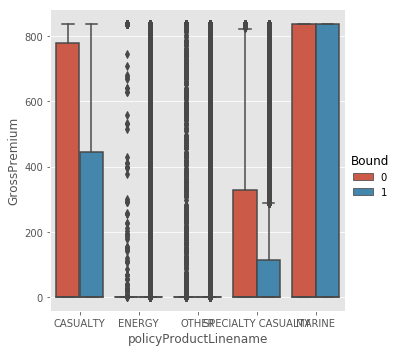

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
final_work_dataset_renewal = final_work_dataset_renewal[final_work_dataset_renewal["policyProductLinename"].isin(['SPECIALTY CASUALTY','CASUALTY','ENERGY','OTHER','MARINE'])]

#final_work_dataset_renewal = final_work_dataset_renewal[final_work_dataset_renewal.policyProductLinename=='SPECIALTY CASUALTY' |
#                                                       final_work_dataset_renewal.policyProductLinename == 'CASUALTY' |
#                                                       final_work_dataset_renewal.policyProductLinename =='ENERGY' |
#                                                       final_work_dataset_renewal.policyProductLinename == 'OTHER' |
#                                                       final_work_dataset_renewal.policyProductLinename == 'MARINE']


sns_plot = sns.catplot(x="policyProductLinename", y="GrossPremium", hue="Bound", kind="box", data=final_work_dataset_renewal)
sns_plot.savefig("C:\\Users\\n0369076\\Desktop\\Initial analysis\\Renewalboxplots_GrossPremium.png")

In [56]:
##Categorical variables to top 5/10 by count for Renewals##

top_5_product = ['SPECIALTY CASUALTY', 'CASUALTY', 'ENERGY', 'OTHER', 'MARINE']
top_5_program = ['MARSH ALLIED HEALTH PROGRAM',
 'None',
 'COMM ASSOC CRIME PRGM',
 'COMM ASSOC D&O PRGM',
 'MARSH MPL PROGRAM']
top_10_broker_group = ['MARSH' , 'GRAHAM' , 'AON','FITZPATRICK' , 'AMWINS' , 'JLT','WILLIS','R T','GALLAGHERS','AFFINITY']
top_10_lineofbusiness = ['ALLIED HEALTH PRIMARY OCCURENC',
 'SPC-FI PRIMARY COMMERCIAL',
 'SPC D&O PRIMARY OTHER LIAB',
 'OIL & GAS',
 'PRIMARY GENERAL LIABILITY',
 'SPC E&O PRIMARY OTHER LIAB',
 'Gen.Liab.- Insured Occurrence',
 'All risk incl Flood and EQ',
 'All Other Property',
 'SPC IT LIAB. PRIMARY SME XOL']
top_10_industry = ['OFFICES OF HEALTH PRACTITIONERS  NEC',
 'NONCLASSIFIABLE ESTABLISHMENTS',
 'APARTMENT BUILDING OPERATORS',
 'CIVIC & SOCIAL ORGANIZATIONS',
 'TRADE SHOWS & FAIRS',
 'SPECIALTY OUTPATIENT CLINICS  NEC',
 'OFFICES & CLINICS OF OPTOMETRISTS',
 'GENERAL MEDICAL & SURGICAL HOSPITALS',
 'HEAVY CONSTRUCTION  NEC',
 'OFFICES & CLINICS OF CHIROPRACTORS']

def toplevels(policy,top_list):
    if policy in top_list:
        return policy
    else:
        return "Others"
    
final_work_dataset_renewal['top_product'] = final_work_dataset_renewal['policyProductLinename'].apply(lambda x: toplevels(x,top_5_product))
final_work_dataset_renewal['top_program'] = final_work_dataset_renewal['Program'].apply(lambda x: toplevels(x,top_5_program))
final_work_dataset_renewal['top_brokergroup'] = final_work_dataset_renewal['Broker Group'].apply(lambda x: toplevels(x,top_10_broker_group))
final_work_dataset_renewal['top_LOB'] = final_work_dataset_renewal['LineofBusinessName'].apply(lambda x: toplevels(x,top_10_lineofbusiness))
final_work_dataset_renewal['top_industry'] = final_work_dataset_renewal['IndustryName'].apply(lambda x: toplevels(x,top_10_industry))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

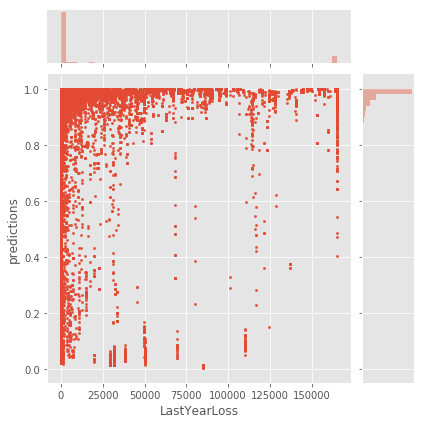

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns_plot = sns.catplot(x="top_product", y="predictions", hue="Bound", kind="swarm", data=final_work_dataset_renewal)
sns_plot = sns.jointplot(x="LastYearLoss", y="predictions",s=5,data=final_work_dataset_renewal)
sns_plot.savefig("C:\\Users\\n0369076\\Desktop\\Initial analysis\\Renewalscatterplots_LastYearLoss.png")

In [80]:
#final_work_dataset_renewal.columns[13:]

for col in final_work_dataset_renewal.columns[14:24]:
    percentiles = final_work_dataset_renewal[col].quantile([0.10,0.90]).values
    final_work_dataset_renewal[col][final_work_dataset_renewal[col] <= percentiles[0]] = percentiles[0]
    final_work_dataset_renewal[col][final_work_dataset_renewal[col] >= percentiles[1]] = percentiles[1]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [109]:
list(final_work_dataset)

['PolicyRegionName',
 'PolicyNumber',
 'Program',
 'NewBusinessRenewalName',
 'AttachmentTypeName',
 'PolicyStateName',
 'policyProductLinename',
 'BrokerName',
 'Broker Group',
 'RiskDescription',
 'LineofBusinessName',
 'IndustryName',
 'CoverageName',
 'reassuredName',
 'Bound',
 'risklimit',
 'CoverageLimit',
 'DeductibleAmount1',
 'FacultativeAttachmentPoint',
 'CoveragePremium',
 'GrossPremium',
 'LastYearLoss',
 'Past6mLoss',
 'LastYearLossCount',
 'LastYearLargeLossCount',
 'LargeLossIndicator',
 'predictions']

In [110]:
for col in final_work_dataset.columns[15:24]:
    percentiles = final_work_dataset[col].quantile([0.10,0.90]).values
    final_work_dataset[col][final_work_dataset[col] <= percentiles[0]] = percentiles[0]
    final_work_dataset[col][final_work_dataset[col] >= percentiles[1]] = percentiles[1]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:7626: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj

In [111]:
final_work_dataset['Bound'].unique()

array([1, 0], dtype=int64)

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


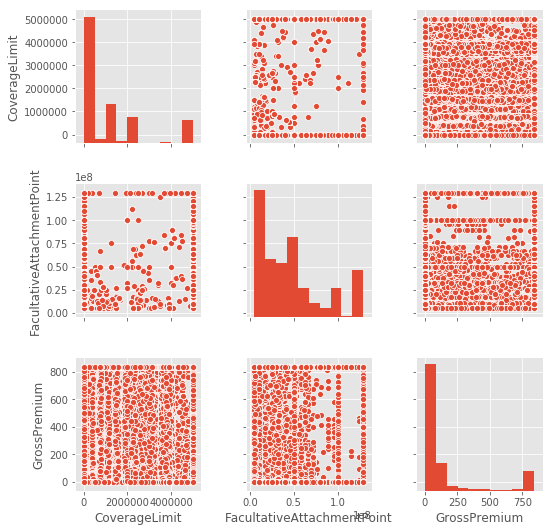

In [62]:
##Paiplots in a dataset##

data_pairplot_renewal = final_work_dataset_renewal[['CoverageLimit','FacultativeAttachmentPoint','GrossPremium']]
data_pairplot_renewal = data_pairplot_renewal[data_pairplot_renewal.GrossPremium < 3113]
#data_pairplot_new = final_work_dataset_new[['risklimit','CoverageLimit','DeductibleAmount1','FacultativeAttachmentPoint',
#            'CoveragePremium','GrossPremium','Commission','Tax']]
import seaborn as sns
import matplotlib.pyplot as plt
sns_plot = sns.pairplot(data_pairplot_renewal)
sns_plot.savefig("C:\\Users\\n0369076\\Desktop\\Initial analysis\\Renewalpairplots.png")
#sns.pairplot(data_pairplot_new)

In [9]:
for col in final_work_dataset_new.columns[14:22]:
    percentiles = final_work_dataset_new[col].quantile([0.10,0.90]).values
    final_work_dataset_new[col][final_work_dataset_new[col] <= percentiles[0]] = percentiles[0]
    final_work_dataset_new[col][final_work_dataset_new[col] >= percentiles[1]] = percentiles[1]

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


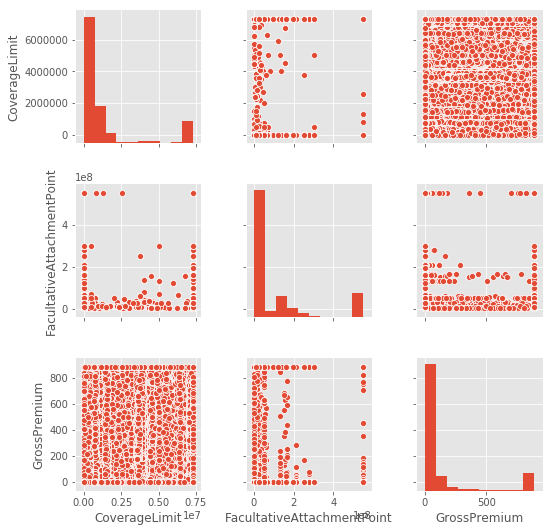

In [68]:
data_pairplot_new = final_work_dataset_new[['CoverageLimit','FacultativeAttachmentPoint','GrossPremium']]
sns_plot = sns.pairplot(data_pairplot_new)

sns_plot.savefig("C:\\Users\\n0369076\\Desktop\\Initial analysis\\Newbusinesspairplots.png")

In [10]:
top_five_productline = final_work_dataset_new.groupby('policyProductLinename').size().reset_index(name="counts")
top_five_productline['Proportion'] = top_five_productline['counts']/top_five_productline['counts'].sum()*100
#top_five_productline
print(top_five_productline.sort_values(by = ["Proportion"], ascending = False).head(5))
top_five_productline.sort_values(by = ["Proportion"], ascending = False).head(5).policyProductLinename.values.tolist()

   policyProductLinename  counts  Proportion
15    SPECIALTY CASUALTY  716859   60.764770
2               CASUALTY  139785   11.848918
0      ACCIDENT & HEALTH   94273    7.991079
13                 OTHER   87927    7.453159
11                MARINE   46620    3.951758


['SPECIALTY CASUALTY', 'CASUALTY', 'ACCIDENT & HEALTH', 'OTHER', 'MARINE']

In [11]:
top_five_program = final_work_dataset_new.groupby('Program').size().reset_index(name="counts")
top_five_program['Proportion'] = top_five_program['counts']/top_five_program['counts'].sum()*100
#top_five_productline
print(top_five_program.sort_values(by = ["Proportion"], ascending = False).head(5))
top_five_program.sort_values(by = ["Proportion"], ascending = False).head(5).Program.values.tolist()

                        Program  counts  Proportion
57                         None  543676   46.084860
42  MARSH ALLIED HEALTH PROGRAM  426458   36.148841
17        COMM ASSOC CRIME PRGM   54152    4.590211
18          COMM ASSOC D&O PRGM   29468    2.497864
25       ENSURANCE CONSTRUCTION   22239    1.885096


['None',
 'MARSH ALLIED HEALTH PROGRAM',
 'COMM ASSOC CRIME PRGM',
 'COMM ASSOC D&O PRGM',
 'ENSURANCE CONSTRUCTION']

In [40]:
#PolicyStateName
top_five_policystate = final_work_dataset_renewal.groupby('PolicyStateName').size().reset_index(name="counts")
top_five_policystate['Proportion'] = top_five_policystate['counts']/top_five_policystate['counts'].sum()*100
#top_five_productline
top_five_policystate.sort_values(by = ["Proportion"], ascending = False).head(20)


,PolicyStateName,counts,Proportion
7,Australia,279233,10.439475
181,USA California,254336,9.508670
186,USA Florida,221192,8.269540
209,USA New York,164659,6.155983
176,USA,150491,5.626294
220,USA Texas,99284,3.711857
215,USA Pennsylvania,90696,3.390784
207,USA New Jersey,83934,3.137978
230,Uk,72004,2.691960
212,USA Ohio,54865,2.051197


In [12]:
#PolicyStateName
final_work_dataset_renewal_broker = final_work_dataset_renewal[final_work_dataset_renewal.Bound == 0]
top_five_brokers = final_work_dataset_new.groupby(['Broker Group','Bound']).size().reset_index(name="counts")
top_five_brokers['Proportion'] = top_five_brokers['counts']/top_five_brokers['counts'].sum()*100
#top_five_productline
print(top_five_brokers.sort_values(by = ["Proportion"], ascending = False).head(10))
#top_five_brokers.sort_values(by = ["Proportion"], ascending = False).head(10).values.tolist()

     Broker Group  Bound  counts  Proportion
1498        MARSH      1  454033   48.250668
980        GRAHAM      1   83622    8.886617
162           AON      1   26695    2.836912
797     ENSURANCE      0   18586    1.975158
234       ASURION      1   14261    1.515535
1904          R T      1   13773    1.463674
906    GALLAGHERS      1   10977    1.166540
148        AMWINS      1    9775    1.038802
869   FITZPATRICK      1    8851    0.940607
1260          JLT      1    7594    0.807024


In [84]:
#len(final_work_dataset_renewal_broker)
#final_work_dataset_new_broker = final_work_dataset_new[final_work_dataset_new.Bound == 0]
#len(final_work_dataset_new_broker)
top_five_brokers = final_work_dataset_renewal.groupby(['Broker Group','Bound','PolicyRegionName']).size().reset_index(name="counts")
top_five_brokers['Proportion'] = top_five_brokers['counts']/top_five_brokers['counts'].sum()*100
#top_five_productline
top_five_brokers.sort_values(by = ["Proportion"], ascending = False).head(5)

,BrokerName,Bound,PolicyRegionName,counts,Proportion
877,ENSURANCE UNDERWRITING PTY LTD,0,\nOceania,18586,13.741350
1921,R T SPECIALTY LLC,0,\nAmericas,3435,2.539629
721,CRC INSURANCE SERVICES INC,0,\nAmericas,3268,2.416159
220,AON RISK SERVICES,0,\nOceania,2916,2.155912
389,AUSTCOVER PTY LIMITED,0,\nOceania,1924,1.422488


In [13]:
top_five_lineofbusiness = final_work_dataset_new.groupby(['LineofBusinessName']).size().reset_index(name="counts")
top_five_lineofbusiness['Proportion'] = top_five_lineofbusiness['counts']/top_five_lineofbusiness['counts'].sum()*100
#top_five_productline
print(top_five_lineofbusiness.sort_values(by = ["Proportion"], ascending = False).head(10))
top_five_lineofbusiness.sort_values(by = ["Proportion"], ascending = False).head(10).LineofBusinessName.values.tolist()

                 LineofBusinessName  counts  Proportion
11   ALLIED HEALTH PRIMARY OCCURENC  382342   32.409335
0              A&H-Corporate Travel   85004    7.205390
218       SPC-FI PRIMARY COMMERCIAL   66801    5.662407
194      SPC D&O PRIMARY OTHER LIAB   55039    4.665397
105   Gen.Liab.- Insured Occurrence   50400    4.272171
171       PRIMARY GENERAL LIABILITY   38814    3.290080
199      SPC E&O PRIMARY OTHER LIAB   28542    2.419371
24               All Other Property   27465    2.328079
28       All risk incl Flood and EQ   23526    1.994188
42       CGL PRIMARY SINGLE PROJECT   20923    1.773544


['ALLIED HEALTH PRIMARY OCCURENC',
 'A&H-Corporate Travel',
 'SPC-FI PRIMARY COMMERCIAL',
 'SPC D&O PRIMARY OTHER LIAB',
 'Gen.Liab.- Insured Occurrence',
 'PRIMARY GENERAL LIABILITY',
 'SPC E&O PRIMARY OTHER LIAB',
 'All Other Property',
 'All risk incl Flood and EQ',
 'CGL PRIMARY SINGLE PROJECT']

In [14]:
top_five_industry = final_work_dataset_new.groupby(['IndustryName']).size().reset_index(name="counts")
top_five_industry['Proportion'] = top_five_industry['counts']/top_five_industry['counts'].sum()*100
#top_five_productline
print(top_five_industry.sort_values(by = ["Proportion"], ascending = False).head(10))
top_five_industry.sort_values(by = ["Proportion"], ascending = False).head(10).IndustryName.values.tolist()

                             IndustryName  counts  Proportion
449        NONCLASSIFIABLE ESTABLISHMENTS  460587   39.041796
466  OFFICES OF HEALTH PRACTITIONERS  NEC  326508   27.676549
24           APARTMENT BUILDING OPERATORS   65510    5.552975
666                   TRADE SHOWS & FAIRS   56782    4.813143
100          CIVIC & SOCIAL ORGANIZATIONS   29523    2.502526
272  GENERAL MEDICAL & SURGICAL HOSPITALS   28006    2.373937
626     SPECIALTY OUTPATIENT CLINICS  NEC   22229    1.884248
614    SINGLE-FAMILY HOUSING CONSTRUCTION   18127    1.536541
291               HEAVY CONSTRUCTION  NEC   14461    1.225791
648       TELEPHONE & TELEGRAPH APPARATUS   14291    1.211381


['NONCLASSIFIABLE ESTABLISHMENTS',
 'OFFICES OF HEALTH PRACTITIONERS  NEC',
 'APARTMENT BUILDING OPERATORS',
 'TRADE SHOWS & FAIRS',
 'CIVIC & SOCIAL ORGANIZATIONS',
 'GENERAL MEDICAL & SURGICAL HOSPITALS',
 'SPECIALTY OUTPATIENT CLINICS  NEC',
 'SINGLE-FAMILY HOUSING CONSTRUCTION',
 'HEAVY CONSTRUCTION  NEC',
 'TELEPHONE & TELEGRAPH APPARATUS']

In [10]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.PolicyRegionName
)

PolicyRegionName,Africa,Americas,Asia,Europe,Oceania,Other/Unknown
Bound,,,,,,
0,31,12644,3215,14383,10913,151
1,1885,2099855,46467,192079,285741,7416


In [11]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.Program
)

Program,ABORIGINAL LAND COUNCILS,ABP PROGRAM,AON A&E ADVANTAGE,AON NON PUBLIC D&O PANEL,AON/ZURICH PORTFOLIO TRAN,ASURION PROGRAM EUROPE,ASURION PROGRAM US,BIZINSURE PROGRAM,BRP PRIVATE COMPANY COMBO PROGRAM,BRP TECH INSURE PROGRAM,...,TOTTEN MEPP PROGRAM,TOTTEN PROGRAM,US CHIROPRACTORS PROGRAM,US-AMS Medical Professional RI,US-E&S Property Program,VK HOWDEN CRIME PROGRAM,VK HOWDEN DUAL MPL,VK HOWDEN PGM - PR/DO,WHITBREAD SME FACILITY,WOOD ALLIED HEALTH PROGRAM
Bound,,,,,,,,,,,,,,,,,,,,,
0,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,142,0
1,70,3416,30,18,3,18,10,2382,5198,84,...,28,4,13928,2,12,2474,306,732,10553,4109


In [12]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.AttachmentTypeName
)

AttachmentTypeName,BUMBERSHOOT,EXCESS,MBOP,PRIMARY,UMBRELLA
Bound,,,,,
0,82,11090,159,29698,308
1,1245,200193,2531,2421673,7801


In [13]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.PolicyStateName
)

PolicyStateName,Afghanistan,Algeria,Andorra,Angola,Argentina,Armenia,Aruba,Australia,Australia Australian Capital Territory,Australia New South Wales,...,Ukraine,United Arab Emirates,United States Minor Outlying Islands,Unknown,Uruguay,Uzbekistan,Venezuela,Vietnam,Wales,Zambia
Bound,,,,,,,,,,,,,,,,,,,,,
0,0,0,12,1,8,0,4,10792,0,2,...,0,7,0,129,11,0,0,38,0,0
1,5,99,180,8,764,5,74,268441,131,7968,...,4,2519,1,7386,111,23,108,187,4,9


In [14]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.policyProductLinename
)

policyProductLinename,ACCIDENT & HEALTH,ARM Product,CASUALTY,COMMERCIAL COMBINED,CRISIS MANAGEMENT,ENERGY,ENGINEERING,ENVIRONMENTAL IMPAIRMENT LIAB,EQUINE,HEAVY INDUSTRY,...,OTHER,PECUNIARY LINES,SPECIALTY CASUALTY,STRATEGIC ASSET,STRATEGIC CAPITAL PRODUCTS,SURETY,TERRORISM & POLITICAL VIOLENCE,TRADE/POL RISKS,UK MOTOR,WORKER'S COMPENSATION
Bound,,,,,,,,,,,,,,,,,,,,,
0,0,0,8702,39,71,3701,13,862,0,161,...,7525,0,17856,103,0,0,91,42,0,0
1,14170,1,247541,1667,4029,140338,529,24486,2925,3088,...,106919,508,2025051,1314,3,125,2586,208,12,6586


In [15]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.BrokerName
)

BrokerName,123 INSURANCE PTY LTD TAS BELL PARTNERS ASSET,1291 INSURANCE BROKERS SA,20:20 INSURANCE SERVICES PTY LTD T/AS 20:20 INSURA,2B SURE INSURANCE BROKERS PTY LTD,3 SPHERES ASSURANCE,A & A INSURANCE UNDERWRITERS,A AND H INSURANCE INC.,A J GALLAGHER INSURANCE BROKERS LIMITED,A&G KOREA INSURANCE BROKING LTD,A'VANT GUARD FINANCIAL GROUP PTY LTD TRADING AS,...,ZILKENS FINE ART INSURANCE BROKER SCHWEIZ GMBH,ZILKENS GMBH GMBH VERSICHERUNGSMAKLER,ZILKENS GMBH VERSICHERUNGSMAKLER,ZITTA CORRETORA E ADMINISTRADORA DE SEGUROS LTDA,ZJHT RISK & INSURANCE SPECIALISTS BV,ZOLEZZI INSURANCE AGENCY,ZURICH AUSTRALIAN INSURANCE LTD,ZZP NEDERLAND VERZEKERINGEN B.V.,ZZZZ (MLYON-MLIB),ÚNICA CORRETORA
Bound,,,,,,,,,,,,,,,,,,,,,
0,0,2,14,1,7,4,0,0,3,0,...,3,0,0,0,0,0,0,148,0,0
1,777,2,19,0,17,0,6,51,137,113,...,6,8,3,2,25,9,10,74,13,2


In [16]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.RiskDescription
)

RiskDescription,#1 - 37.5 PO 10MM XS $25,#1 - 37.5 PO125MM XS $25,#2-$15MM PO $50MM XS 25MM,#3 - 9MM PO 30MM XS 25MM,#4 - 6MM PO 20MM XS 25MM,#5 - 3MM PO 10MM XS 25MM,#ONTHLY BDX 2018,#ROFESSIONAL LIAB/INDEM,$1 329 550-BC,$1 361 410 - BC,...,\ROF LIAB/INDEM,\ROFESSIONAL LIAB/INDEM,\ROPERTY,}GL,µGL,µYBER SUITE,ÇGL,ÇIBERTY ENVIRONMENTAL DAM,ÇIDELITY FI BOND,ÇXCESS
Bound,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,8,8,8,8,1,10,1,1,...,2,3,6,2,2,2,2,36,14,2


In [17]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.LineofBusinessName
)

LineofBusinessName,A&H-Corporate Travel,A&H-Expatriate,A&H-Group Education,A&H-Group Employer,A&H-Group Journey,A&H-Group Sports,A&H-Group Voluntary Workers,ALL OTH PROP ALLIED LINES,ALL OTH PROPERTY BOILER MACH,ALLIED HEALTH PRIMARY OCCURENC,...,UMB Pol-All Oth,UMB/EXC XS LIU CGL & AUTO,UMBRELLA,UMBRELLA XS LIU GL,W&I buyer side policy,WORKERS' COMPENSATION,WWRI AGRICULTURE,WWRI PROPERTY,XSFF Global Treaty E&S Rating,XSFF Global Treaty Rating
Bound,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,685,0,0,...,0,59,147,4,0,4,0,0,0,12
1,12974,54,12,216,208,176,418,9796,6,1221351,...,145,1252,4205,338,6,1248,4,42,5,600


In [18]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.IndustryName
)

IndustryName,ACCOUNTING AUDITING & BOOKKEEPING,ADHESIVES & SEALANTS,ADJUSTMENT & COLLECTION SERVICES,ADVERTISING NEC,ADVERTISING AGENCIES,AGRICULTURAL CHEMICALS NEC,AGRICULTURAL PRODUCTS,AIR WATER & SOLID WASTE MANAGEMENT,AIR & GAS COMPRESSORS,AIR COURIER SERVICES,...,WOMEN'S FOOTWEAR EXCEPT ATHLETIC,WOMEN'S HANDBAGS & PURSES,WOOD HOUSEHOLD FURNITURE,WOOD OFFICE FURNITURE,WOOD PALLETS & SKIDS,WOOD PRODUCTS NEC,WOOD TV & RADIO CABINETS,WOODWORKING MACHINERY,WRECKING & DEMOLITION WORK,YARN SPINNING MILLS
Bound,,,,,,,,,,,,,,,,,,,,,
0,355,0,0,0,11,0,5,0,0,56,...,0,0,3,0,0,0,0,0,59,0
1,7071,8,49,28,53,73,0,17,10,1723,...,3,6,42,98,8,3,72,2,287,28


In [19]:
pd.crosstab(
    final_work_dataset_renewal.Bound,final_work_dataset_renewal.CoverageName
)

CoverageName,3RD PARTY RECALL,ABUSE AND MOLESTATION LIAB,ACCIDENT BENEFITS,ACCIDENT BENEFITS ENDORSEMENT,ACCIDENTAL CONTAMINATION,ACCIDENTAL DEATH,ACCOUNT RATING FLAG - ASIA PAC,AGENTS COVER,AGGREGATE,AGGREGATE CLAIMS EXPENSE LIMIT,...,WEEKLY INCOME INJURY,WEEKLY INCOME SICKNESS,WHARFOWNER'S LEGAL LIABILITY,WHSE/STORAGE,WIND LIMIT,WORKER'S COMP,WORKER'S COMP (WICA),WORKER'S COMPENSATION,WORKERS HEALTH AND SAFETY,YAHOO CODES
Bound,,,,,,,,,,,,,,,,,,,,,
0,39,0,218,16,13,0,2833,0,25,1,...,0,0,2,46,11,0,98,0,20,124
1,2962,1,5178,238,1163,1162,57328,43,1552,20,...,1162,1162,26,757,74,4543,1172,1950,1079,840


In [75]:
##Categorical variables to top 5/10 by count for Renewals##

top_5_product = ['SPECIALTY CASUALTY', 'CASUALTY', 'ENERGY', 'OTHER', 'MARINE']
top_5_program = ['MARSH ALLIED HEALTH PROGRAM',
 'None',
 'COMM ASSOC CRIME PRGM',
 'COMM ASSOC D&O PRGM',
 'MARSH MPL PROGRAM']
top_10_broker_group = ['MARSH' , 'GRAHAM' , 'AON','FITZPATRICK' , 'AMWINS' , 'JLT','WILLIS','R T','GALLAGHERS','AFFINITY']
top_10_lineofbusiness = ['ALLIED HEALTH PRIMARY OCCURENC',
 'SPC-FI PRIMARY COMMERCIAL',
 'SPC D&O PRIMARY OTHER LIAB',
 'OIL & GAS',
 'PRIMARY GENERAL LIABILITY',
 'SPC E&O PRIMARY OTHER LIAB',
 'Gen.Liab.- Insured Occurrence',
 'All risk incl Flood and EQ',
 'All Other Property',
 'SPC IT LIAB. PRIMARY SME XOL']
top_10_industry = ['OFFICES OF HEALTH PRACTITIONERS  NEC',
 'NONCLASSIFIABLE ESTABLISHMENTS',
 'APARTMENT BUILDING OPERATORS',
 'CIVIC & SOCIAL ORGANIZATIONS',
 'TRADE SHOWS & FAIRS',
 'SPECIALTY OUTPATIENT CLINICS  NEC',
 'OFFICES & CLINICS OF OPTOMETRISTS',
 'GENERAL MEDICAL & SURGICAL HOSPITALS',
 'HEAVY CONSTRUCTION  NEC',
 'OFFICES & CLINICS OF CHIROPRACTORS']

def toplevels(policy,top_list):
    if policy in top_list:
        return policy
    else:
        return "Others"
    
final_work_dataset_renewal['top_product'] = final_work_dataset_renewal['policyProductLinename'].apply(lambda x: toplevels(x,top_5_product))
final_work_dataset_renewal['top_program'] = final_work_dataset_renewal['Program'].apply(lambda x: toplevels(x,top_5_program))
final_work_dataset_renewal['top_brokergroup'] = final_work_dataset_renewal['Broker Group'].apply(lambda x: toplevels(x,top_10_broker_group))
final_work_dataset_renewal['top_LOB'] = final_work_dataset_renewal['LineofBusinessName'].apply(lambda x: toplevels(x,top_10_lineofbusiness))
final_work_dataset_renewal['top_industry'] = final_work_dataset_renewal['IndustryName'].apply(lambda x: toplevels(x,top_10_industry))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [77]:
top_five_industry = final_work_dataset_renewal.groupby(['top_product','Bound']).agg({'GrossPremium': 'sum'})
top_five_industry['Proportion'] = top_five_industry['counts']/top_five_industry['counts'].sum()*100
#top_five_productline
print(top_five_industry.sort_values(by = ["Proportion"], ascending = False).head(10))

KeyError: 'counts'

In [45]:
##Function to add bins of continuous variables##
print(final_work_dataset_renewal.GrossPremium.quantile(0.90))
print(final_work_dataset_renewal.DeductibleAmount1.quantile(0.85))
print(final_work_dataset_renewal.risklimit.quantile(0.5))
print(final_work_dataset_renewal.CoverageLimit.quantile(0.75))
print(final_work_dataset_renewal.FacultativeAttachmentPoint.quantile(0.5))
print(final_work_dataset_renewal.CoveragePremium.quantile(0.85))
#policy.Commission.quantile(0.8)
#policy.Tax.quantile(0.95)

885.0
161.0
1497902.9358899998
1231950.386894
38461538.0
568.2371493499975


In [177]:
##Binning of continuous variables##

def gross_bin(gross_premium):
    if gross_premium < 114.0 :
        return "<114"
    elif gross_premium < 885.0:
        return "114-885"
    else:
        return ">885"
    
def deductibles_bin(deductibles):
    if deductibles < 161.0:
        return "<161"
    else:
        return ">161"
    
def risklimit_bin(risklimit):
    if risklimit < 1000000.0:
        return "<1000000"
    elif risklimit < 1497902.9358899998:
        return "1000000-1497902"
    else:
        return ">1497902"
    
def coveragelimit_bin(CoverageLimit):
    if CoverageLimit < 25000.0:
        return "<25000"
    elif CoverageLimit < 1231950.386894:
        return "25000-1231950"
    else:
        return ">1231950"
    
def attachmentpoint_bin(attachmentpoint):
    if attachmentpoint < 15000000.0:
        return "<15000000"
    elif attachmentpoint < 38461538.0:
        return "15000000-38461538"
    else:
        return ">38461538"
    
def coveragepremium_bin(coveragepremium):
    if coveragepremium < 127.0:
        return "<127"
    elif coveragepremium < 568.2371493499975:
        return "127-568"
    else:
        return ">568"
    
final_work_dataset['bin_grosspremium'] = final_work_dataset['GrossPremium'].apply(lambda x: gross_bin(x))
final_work_dataset['bin_deductibles'] = final_work_dataset['DeductibleAmount1'].apply(lambda x: deductibles_bin(x))
final_work_dataset['bin_risklimit'] = final_work_dataset['risklimit'].apply(lambda x: risklimit_bin(x))
final_work_dataset['bin_coveragelimit'] = final_work_dataset['CoverageLimit'].apply(lambda x: coveragelimit_bin(x))
final_work_dataset['bin_attachmentpoint'] = final_work_dataset['FacultativeAttachmentPoint'].apply(lambda x: attachmentpoint_bin(x))
final_work_dataset['bin_coveragepremium'] = final_work_dataset['CoveragePremium'].apply(lambda x: coveragepremium_bin(x))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [113]:
final_work_dataset['Bound'].unique()

array([1, 0], dtype=int64)

In [178]:
##Categorical plots for binned continuous variables##
risklimit_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_risklimit"]).agg({"PolicyNumber": pd.Series.nunique})
risklimit_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_risklimit"],as_index=False).agg({"PolicyNumber": pd.Series.nunique})
risklimit_grp

,Bound,NewBusinessRenewalName,bin_risklimit,PolicyNumber
0,0,NEW BUSINESS,1000000-1497902,1874
1,0,NEW BUSINESS,<1000000,7929
2,0,NEW BUSINESS,>1497902,28407
3,0,RENEWAL,1000000-1497902,1079
4,0,RENEWAL,<1000000,1849
5,0,RENEWAL,>1497902,5273
6,1,NEW BUSINESS,1000000-1497902,179731
7,1,NEW BUSINESS,<1000000,75415
8,1,NEW BUSINESS,>1497902,103677
9,1,RENEWAL,1000000-1497902,416060


In [179]:
def CalcProp(nb_ren, industry, polcount):
    total = risklimit_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
risklimit_grp['Proportion'] = np.vectorize(CalcProp)(risklimit_grp['NewBusinessRenewalName'], risklimit_grp['bin_risklimit'], risklimit_grp["PolicyNumber"])
risklimit_grp = risklimit_grp[risklimit_grp ["Bound"] == 1]

In [128]:
risklimit_grp

,Bound,NewBusinessRenewalName,bin_risklimit,PolicyNumber,Proportion
6,1,NEW BUSINESS,Large,103677,0.784932
7,1,NEW BUSINESS,Medium,179731,0.989681
8,1,NEW BUSINESS,Small,75415,0.904864
9,1,RENEWAL,Large,385539,0.986508
10,1,RENEWAL,Medium,416060,0.997413
11,1,RENEWAL,Small,106846,0.982989


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

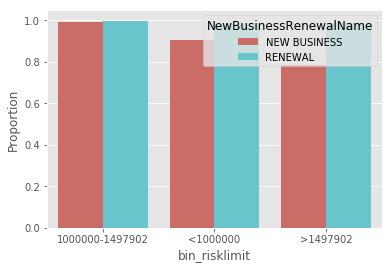

In [182]:
import seaborn as sns
import matplotlib.pyplot as plt
sns_plot=sns.barplot(x="bin_risklimit", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=risklimit_grp, palette = "hls")
sns_plot.savefig("C:\\Users\\n0369076\\Desktop\\Initial analysis\\riskplot.png")

In [183]:
coveragelimit_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_coveragelimit"]).agg({"PolicyNumber": pd.Series.nunique})

coveragelimit_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_coveragelimit"],as_index = False).agg({"PolicyNumber": pd.Series.nunique})
coveragelimit_grp

,Bound,NewBusinessRenewalName,bin_coveragelimit,PolicyNumber
0,0,NEW BUSINESS,25000-1231950,8722
1,0,NEW BUSINESS,<25000,28330
2,0,NEW BUSINESS,>1231950,19587
3,0,RENEWAL,25000-1231950,3028
4,0,RENEWAL,<25000,6642
5,0,RENEWAL,>1231950,5554
6,1,NEW BUSINESS,25000-1231950,228681
7,1,NEW BUSINESS,<25000,287125
8,1,NEW BUSINESS,>1231950,105825
9,1,RENEWAL,25000-1231950,505326


In [184]:
def CalcProp(nb_ren, industry, polcount):
    total = coveragelimit_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
coveragelimit_grp['Proportion'] = np.vectorize(CalcProp)(coveragelimit_grp['NewBusinessRenewalName'], coveragelimit_grp['bin_coveragelimit'], coveragelimit_grp["PolicyNumber"])
coveragelimit_grp = coveragelimit_grp[coveragelimit_grp ["Bound"] == 1]

In [133]:
coveragelimit_grp

,Bound,NewBusinessRenewalName,bin_coveragelimit,PolicyNumber,Proportion
6,1,NEW BUSINESS,Large,105825,0.843819
7,1,NEW BUSINESS,Medium,228681,0.963261
8,1,NEW BUSINESS,Small,287125,0.910193
9,1,RENEWAL,Large,387303,0.985863
10,1,RENEWAL,Medium,505326,0.994044
11,1,RENEWAL,Small,827605,0.992038


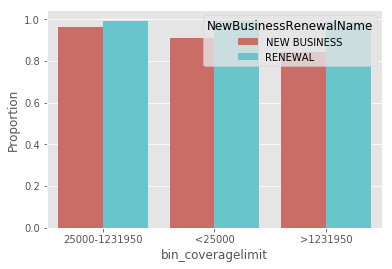

In [185]:
import seaborn as sns
sns.barplot(x="bin_coveragelimit", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=coveragelimit_grp, palette = "hls")

In [186]:
grosspremium_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_grosspremium"]).agg({"PolicyNumber": pd.Series.nunique})

grosspremium_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_grosspremium"],as_index = False).agg({"PolicyNumber": pd.Series.nunique})
grosspremium_grp

,Bound,NewBusinessRenewalName,bin_grosspremium,PolicyNumber
0,0,NEW BUSINESS,114-885,7413
1,0,NEW BUSINESS,<114,36344
2,0,NEW BUSINESS,>885,5930
3,0,RENEWAL,114-885,1547
4,0,RENEWAL,<114,7338
5,0,RENEWAL,>885,6385
6,1,NEW BUSINESS,114-885,108647
7,1,NEW BUSINESS,<114,297311
8,1,NEW BUSINESS,>885,91961
9,1,RENEWAL,114-885,354757


In [187]:
def CalcProp(nb_ren, industry, polcount):
    total = grosspremium_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
grosspremium_grp['Proportion'] = np.vectorize(CalcProp)(grosspremium_grp['NewBusinessRenewalName'], grosspremium_grp['bin_grosspremium'], grosspremium_grp["PolicyNumber"])
grosspremium_grp = grosspremium_grp[grosspremium_grp ["Bound"] == 1]

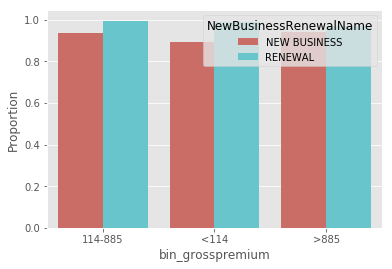

In [188]:
import seaborn as sns
sns.barplot(x="bin_grosspremium", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=grosspremium_grp, palette = "hls")

In [189]:
deductibles_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_deductibles"]).agg({"PolicyNumber": pd.Series.nunique})

deductibles_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_deductibles"],as_index = False).agg({"PolicyNumber": pd.Series.nunique})
deductibles_grp

,Bound,NewBusinessRenewalName,bin_deductibles,PolicyNumber
0,0,NEW BUSINESS,<161,36614
1,0,NEW BUSINESS,>161,14750
2,0,RENEWAL,<161,7365
3,0,RENEWAL,>161,5455
4,1,NEW BUSINESS,<161,322496
5,1,NEW BUSINESS,>161,75760
6,1,RENEWAL,<161,858687
7,1,RENEWAL,>161,191530


In [190]:
def CalcProp(nb_ren, industry, polcount):
    total = deductibles_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
deductibles_grp['Proportion'] = np.vectorize(CalcProp)(deductibles_grp['NewBusinessRenewalName'], deductibles_grp['bin_deductibles'], deductibles_grp["PolicyNumber"])
deductibles_grp = deductibles_grp[deductibles_grp ["Bound"] == 1]

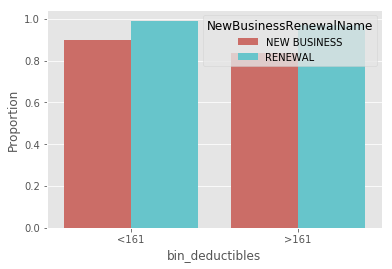

In [192]:
import seaborn as sns
sns.barplot(x="bin_deductibles", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=deductibles_grp, palette = "hls")

In [193]:
attachmentpoint_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_attachmentpoint"]).agg({"PolicyNumber": pd.Series.nunique})

attachmentpoint_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_attachmentpoint"],as_index = False).agg({"PolicyNumber": pd.Series.nunique})
attachmentpoint_grp

,Bound,NewBusinessRenewalName,bin_attachmentpoint,PolicyNumber
0,0,NEW BUSINESS,15000000-38461538,1
1,0,NEW BUSINESS,<15000000,7
2,0,NEW BUSINESS,>38461538,37604
3,0,RENEWAL,15000000-38461538,29
4,0,RENEWAL,<15000000,11
5,0,RENEWAL,>38461538,7561
6,1,NEW BUSINESS,15000000-38461538,107
7,1,NEW BUSINESS,<15000000,142
8,1,NEW BUSINESS,>38461538,327989
9,1,RENEWAL,15000000-38461538,590


In [194]:
def CalcProp(nb_ren, industry, polcount):
    total = attachmentpoint_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
attachmentpoint_grp['Proportion'] = np.vectorize(CalcProp)(attachmentpoint_grp['NewBusinessRenewalName'], attachmentpoint_grp['bin_attachmentpoint'], attachmentpoint_grp["PolicyNumber"])
attachmentpoint_grp = attachmentpoint_grp[attachmentpoint_grp ["Bound"] == 1]

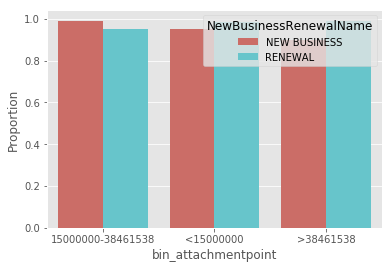

In [196]:
import seaborn as sns
sns.barplot(x="bin_attachmentpoint", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=attachmentpoint_grp, palette = "hls")

In [197]:
coveragepremium_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_coveragepremium"]).agg({"PolicyNumber": pd.Series.nunique})

coveragepremium_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_coveragepremium"],as_index = False).agg({"PolicyNumber": pd.Series.nunique})
coveragepremium_grp

,Bound,NewBusinessRenewalName,bin_coveragepremium,PolicyNumber
0,0,NEW BUSINESS,127-568,7699
1,0,NEW BUSINESS,<127,35107
2,0,NEW BUSINESS,>568,13447
3,0,RENEWAL,127-568,1000
4,0,RENEWAL,<127,7251
5,0,RENEWAL,>568,6970
6,1,NEW BUSINESS,127-568,75198
7,1,NEW BUSINESS,<127,291717
8,1,NEW BUSINESS,>568,122520
9,1,RENEWAL,127-568,223370


In [198]:
def CalcProp(nb_ren, industry, polcount):
    total = coveragepremium_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
coveragepremium_grp['Proportion'] = np.vectorize(CalcProp)(coveragepremium_grp['NewBusinessRenewalName'], coveragepremium_grp['bin_coveragepremium'], coveragepremium_grp["PolicyNumber"])
coveragepremium_grp = coveragepremium_grp[coveragepremium_grp ["Bound"] == 1]

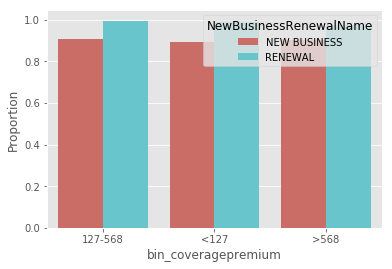

In [199]:
import seaborn as sns
sns.barplot(x="bin_coveragepremium", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=coveragepremium_grp, palette = "hls")

In [157]:
print(final_work_dataset.LastYearLoss.quantile(0.90))

165328.0


In [200]:
def past6mLoss_bin(past6mLoss):
    if past6mLoss < 45545.0:
        return "<45545"
    else:
        return ">45545"
    
def lastyearloss_bin(lastyearloss):
    if lastyearloss < 236.0:
        return "<236"
    elif lastyearloss < 165328.0:
        return "236-165328"
    else:
        return ">165328"
    
final_work_dataset['bin_past6mLoss'] = final_work_dataset['Past6mLoss'].apply(lambda x: past6mLoss_bin(x))
final_work_dataset['bin_lastyearloss'] = final_work_dataset['LastYearLoss'].apply(lambda x: lastyearloss_bin(x))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [201]:
past6mLoss_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_past6mLoss"]).agg({"PolicyNumber": pd.Series.nunique})

past6mLoss_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_past6mLoss"],as_index = False).agg({"PolicyNumber": pd.Series.nunique})
past6mLoss_grp

,Bound,NewBusinessRenewalName,bin_past6mLoss,PolicyNumber
0,0,NEW BUSINESS,<45545,356
1,0,NEW BUSINESS,>45545,37256
2,0,RENEWAL,<45545,563
3,0,RENEWAL,>45545,7030
4,1,NEW BUSINESS,<45545,4100
5,1,NEW BUSINESS,>45545,324099
6,1,RENEWAL,<45545,7842
7,1,RENEWAL,>45545,857402


In [202]:
def CalcProp(nb_ren, industry, polcount):
    total = past6mLoss_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
past6mLoss_grp['Proportion'] = np.vectorize(CalcProp)(past6mLoss_grp['NewBusinessRenewalName'],past6mLoss_grp['bin_past6mLoss'], past6mLoss_grp["PolicyNumber"])
past6mLoss_grp = past6mLoss_grp[past6mLoss_grp ["Bound"] == 1]

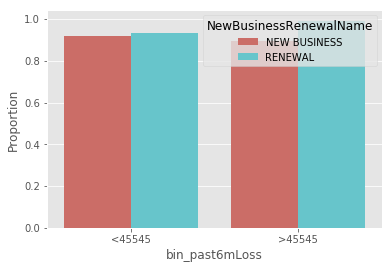

In [203]:
import seaborn as sns
sns.barplot(x="bin_past6mLoss", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=past6mLoss_grp, palette = "hls")

In [204]:
lastyearLoss_sum = final_work_dataset.groupby(["NewBusinessRenewalName", "bin_lastyearloss"]).agg({"PolicyNumber": pd.Series.nunique})

lastyearLoss_grp = final_work_dataset.groupby(["Bound", "NewBusinessRenewalName", "bin_lastyearloss"],as_index = False).agg({"PolicyNumber": pd.Series.nunique})
lastyearLoss_grp

,Bound,NewBusinessRenewalName,bin_lastyearloss,PolicyNumber
0,0,NEW BUSINESS,236-165328,7
1,0,NEW BUSINESS,<236,348
2,0,NEW BUSINESS,>165328,37257
3,0,RENEWAL,236-165328,142
4,0,RENEWAL,<236,428
5,0,RENEWAL,>165328,7023
6,1,NEW BUSINESS,236-165328,87
7,1,NEW BUSINESS,<236,4023
8,1,NEW BUSINESS,>165328,324089
9,1,RENEWAL,236-165328,1356


In [205]:
def CalcProp(nb_ren, industry, polcount):
    total = lastyearLoss_sum.loc[nb_ren, industry].values[0]
    prop = polcount/total
    return prop
lastyearLoss_grp['Proportion'] = np.vectorize(CalcProp)(lastyearLoss_grp['NewBusinessRenewalName'],lastyearLoss_grp['bin_lastyearloss'], lastyearLoss_grp["PolicyNumber"])
lastyearLoss_grp = lastyearLoss_grp[lastyearLoss_grp ["Bound"] == 1]

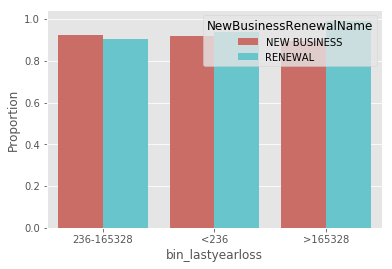

In [206]:
import seaborn as sns
sns.barplot(x="bin_lastyearloss", y="Proportion", hue="NewBusinessRenewalName", orient = "v", data=lastyearLoss_grp, palette = "hls")

In [118]:
top_five_industry = final_work_dataset_renewal.groupby(['top_industry']).size().reset_index(name="counts")
top_five_industry['Proportion'] = top_five_industry['counts']/top_five_industry['counts'].sum()*100
#top_five_productline
print(top_five_industry.sort_values(by = ["Proportion"], ascending = False).head(11))

                            top_industry   counts  Proportion
7   OFFICES OF HEALTH PRACTITIONERS  NEC  1078469   40.319914
4         NONCLASSIFIABLE ESTABLISHMENTS   743133   27.782958
8                                 Others   234407    8.763599
0           APARTMENT BUILDING OPERATORS   208041    7.777873
1           CIVIC & SOCIAL ORGANIZATIONS   126031    4.711827
10                   TRADE SHOWS & FAIRS    96418    3.604708
9      SPECIALTY OUTPATIENT CLINICS  NEC    65377    2.444201
6      OFFICES & CLINICS OF OPTOMETRISTS    43909    1.641593
2   GENERAL MEDICAL & SURGICAL HOSPITALS    41777    1.561885
3                HEAVY CONSTRUCTION  NEC    23290    0.870726
5     OFFICES & CLINICS OF CHIROPRACTORS    13928    0.520716


In [119]:
list(final_work_dataset_renewal)

['PolicyRegionName',
 'Program',
 'NewBusinessRenewalName',
 'AttachmentTypeName',
 'PolicyStateName',
 'policyProductLinename',
 'BrokerName',
 'Broker Group',
 'RiskDescription',
 'LineofBusinessName',
 'IndustryName',
 'CoverageName',
 'reassuredName',
 'Bound',
 'risklimit',
 'CoverageLimit',
 'DeductibleAmount1',
 'FacultativeAttachmentPoint',
 'CoveragePremium',
 'GrossPremium',
 'Commission',
 'Tax',
 'top_product',
 'top_program',
 'top_brokergroup',
 'top_LOB',
 'top_industry']

In [11]:
lists_=[u'PolicyRegionName', u'AttachmentTypeName', u'top_product',u'top_program', u'top_brokergroup',u'top_LOB',
       'top_industry']

for k in range(len(lists_)):
    if k == 0:
        independent_undersample = pd.get_dummies(final_work_dataset_renewal[lists_[k]].astype('category'))
        independent_undersample.index = final_work_dataset_renewal.index
        independent_undersample.columns = [lists_[k]+"_bucket_"+str(each) for each in range(independent_undersample.shape[1])]
    else:
        cat = pd.get_dummies(final_work_dataset_renewal[lists_[k]].astype('category'))
        cat.index = final_work_dataset_renewal.index
        cat.columns = [lists_[k]+"_bucket_"+str(each) for each in cat.columns]
        independent_undersample = pd.concat([independent_undersample,cat],axis=1)
#response_train_undersample = training_undersample['Response']


In [27]:
final_work_dataset_renewal_tobemerged = final_work_dataset_renewal.drop(['PolicyRegionName',
 'Program',
 'NewBusinessRenewalName',
 'AttachmentTypeName',
 'PolicyStateName',
 'policyProductLinename',
 'BrokerName',
 'Broker Group',
 'RiskDescription',
 'LineofBusinessName',
 'IndustryName',
 'CoverageName',
 'reassuredName',                                                                        
 'top_product',
 'top_program',
 'top_brokergroup',
 'top_LOB',
 'top_industry'],axis = 1)

final_renewal_dataset = pd.concat([final_work_dataset_renewal_tobemerged,independent_undersample],axis=1)
final_renewal_dataset.head(5)

,Bound,risklimit,CoverageLimit,DeductibleAmount1,FacultativeAttachmentPoint,CoveragePremium,GrossPremium,PolicyRegionName_bucket_0,PolicyRegionName_bucket_1,PolicyRegionName_bucket_2,...,top_industry_bucket_CIVIC & SOCIAL ORGANIZATIONS,top_industry_bucket_GENERAL MEDICAL & SURGICAL HOSPITALS,top_industry_bucket_HEAVY CONSTRUCTION NEC,top_industry_bucket_NONCLASSIFIABLE ESTABLISHMENTS,top_industry_bucket_OFFICES & CLINICS OF CHIROPRACTORS,top_industry_bucket_OFFICES & CLINICS OF OPTOMETRISTS,top_industry_bucket_OFFICES OF HEALTH PRACTITIONERS NEC,top_industry_bucket_Others,top_industry_bucket_SPECIALTY OUTPATIENT CLINICS NEC,top_industry_bucket_TRADE SHOWS & FAIRS
1,1,1.415500e+07,5.136213e+06,0.0,NaN,0.0,0.00,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,1.415500e+07,5.136213e+06,0.0,NaN,0.0,0.00,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1.415500e+07,0.000000e+00,0.0,NaN,1321.0,384.68,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1.415500e+07,0.000000e+00,0.0,NaN,0.0,0.00,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,1.415500e+07,5.136213e+06,0.0,NaN,0.0,0.00,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
##Replacing Inf and missing##
final_renewal_dataset[final_renewal_dataset==np.inf]=np.nan
final_renewal_dataset.fillna(final_renewal_dataset.median(), inplace=True)

In [29]:
# Lets create the dataset that will be used for determining feature importance.
featureNamesarr = final_renewal_dataset.columns.difference(['Bound']).values
featureNamesarr

array(['AttachmentTypeName_bucket_BUMBERSHOOT',
       'AttachmentTypeName_bucket_EXCESS',
       'AttachmentTypeName_bucket_MBOP',
       'AttachmentTypeName_bucket_PRIMARY',
       'AttachmentTypeName_bucket_UMBRELLA', 'CoverageLimit',
       'CoveragePremium', 'DeductibleAmount1',
       'FacultativeAttachmentPoint', 'GrossPremium',
       'PolicyRegionName_bucket_0', 'PolicyRegionName_bucket_1',
       'PolicyRegionName_bucket_2', 'PolicyRegionName_bucket_3',
       'PolicyRegionName_bucket_4', 'PolicyRegionName_bucket_5',
       'risklimit', 'top_LOB_bucket_ALLIED HEALTH PRIMARY OCCURENC',
       'top_LOB_bucket_All Other Property',
       'top_LOB_bucket_All risk incl Flood and EQ',
       'top_LOB_bucket_Gen.Liab.- Insured Occurrence',
       'top_LOB_bucket_OIL & GAS', 'top_LOB_bucket_Others',
       'top_LOB_bucket_PRIMARY GENERAL LIABILITY',
       'top_LOB_bucket_SPC D&O PRIMARY OTHER LIAB',
       'top_LOB_bucket_SPC E&O PRIMARY OTHER LIAB',
       'top_LOB_bucket_SPC IT LI

In [30]:
xTrain = final_renewal_dataset[featureNamesarr].values
yTrain = final_renewal_dataset["Bound"].values

In [31]:
import pandas as pd
xdf = pd.DataFrame(xTrain)
ydf = pd.DataFrame(yTrain)

In [32]:
xdf.columns=featureNamesarr

In [33]:
ydf.columns=["Bound"]

In [34]:
# splitting the training dataset
from sklearn.model_selection import train_test_split 
xdf_train, xdf_test, ydf_train, ydf_test = train_test_split(xdf, ydf, test_size=0.3, 
                                                    random_state=1) 

In [23]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
xdf_train_logit = StandardScaler().fit_transform(xdf_train)
xdf_test_logit = StandardScaler().fit_transform(xdf_test)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
pca.fit(xdf_train_logit)
xdf_train_logit = pca.transform(xdf_train_logit)
xdf_test_logit = pca.transform(xdf_test_logit)

In [58]:
import statsmodels.api as sm
#titanic_logit = sm.formula.glm("Survived~"+all_columns,family=sm.families.Binomial(), data=titanic_train).fit()
logit = sm.Logit(ydf_train, xdf_train)
result = logit.fit()

C:\Program Files\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [25]:
print (result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Bound   No. Observations:              1872346
Model:                          Logit   Df Residuals:                  1872291
Method:                           MLE   Df Model:                           54
Date:                Tue, 16 Apr 2019   Pseudo R-squ.:                  -7.676
Time:                        03:28:46   Log-Likelihood:            -1.2949e+06
converged:                      False   LL-Null:                   -1.4925e+05
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0035   4153.442  -8.32e-07      1.000   -8140.600    8140.593
x2            -0.0123   5.13e+04   -2.4e-07      1.000   -1.01e+05    1.01e+05
x3            -0.0019   6017.626  -3.08e-07      1.0

In [25]:
# Creating preidctions for the cross-validation dataset
predicted = result.predict(xdf_test_logit)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predicted]
actuals = ydf_test['Bound'].values

In [26]:
# Building a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ydf_test['Bound'], predictions_nominal)
print(cm)

[[ 12044    385]
 [251941 538064]]


In [27]:
TP = float(cm[1,1])
FP = float(cm[1,0])
FN = float(cm[0,1])
TN = float(cm[0,0])
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
Accuracy = (TP+TN)/(TP+TN+FP+FN)
F1Score = (2*Precision*Recall)/(Precision+Recall)

In [28]:
print("Precision ==>", Precision)
print("Recall ==>", Recall)
print("Accuracy ==>", Accuracy)
print("F1score ==>", F1Score)

Precision ==> 0.6810893601939229
Recall ==> 0.9992849833503266
Accuracy ==> 0.6855492165087721
F1score ==> 0.8100604160926911


In [29]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(actuals, predicted, pos_label=1)
lauc = metrics.auc(fpr, tpr)
lauc

0.8954788522826591

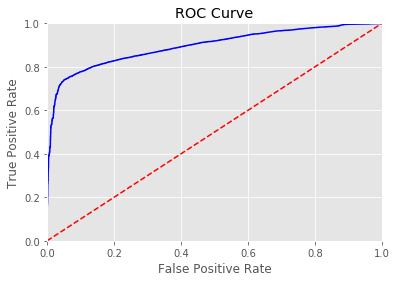

In [35]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b',
label='AUC Logistic = %0.2f'% lauc)
#plt.plot(tfpr, ttpr, 'g',
#plt.legend(loc='lower right')         
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=1)
clf.fit(xdf_train, ydf_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [36]:
acc_decision_tree = round(clf.score(xdf_train, ydf_train), 4)
print("Accuracy: %0.4f" % (acc_decision_tree))

Accuracy: 0.9929


In [37]:
predictions = clf.predict(xdf_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
# Building a confusion matrix
from sklearn.metrics import confusion_matrix
cmt=confusion_matrix(ydf_test,predictions)
print (cmt)

[[  5607   6822]
 [  2938 787067]]


In [41]:
TP = float(cmt[1,1])
FP = float(cmt[1,0])
FN = float(cmt[0,1])
TN = float(cmt[0,0])
tPrecision = TP/(TP+FP)
tRecall = TP/(TP+FN)
tSpecificity = TN/(TN+FP)
FNR = FN/(TP+FN)
FPR = FP/(TN+FP)
tAccuracy = (TP+TN)/(TP+TN+FP+FN)
tF1Score = (2*tPrecision*tRecall)/(tPrecision+tRecall)

In [42]:
print("Precision ==>", tPrecision)
print("Recall ==>", tRecall)
print("Specificity ==>", tSpecificity)
print("False Negative Rate ==>",FNR)
print("False Positive Rate ==>",FPR)
print("Accuracy ==>", tAccuracy)
print("F1score ==>", tF1Score)

Precision ==> 0.9962810361959734
Recall ==> 0.9914068591452961
Specificity ==> 0.656173200702165
False Negative Rate ==> 0.00859314085470387
False Positive Rate ==> 0.343826799297835
Accuracy ==> 0.9878370059095203
F1score ==> 0.9938379714804148


In [43]:
from sklearn import metrics
actuals = ydf_test['Bound'].values
fpr, tpr, thresholds = metrics.roc_curve(actuals, predictions, pos_label=1)
tauc = metrics.auc(fpr, tpr)
tauc

0.7237017056432438

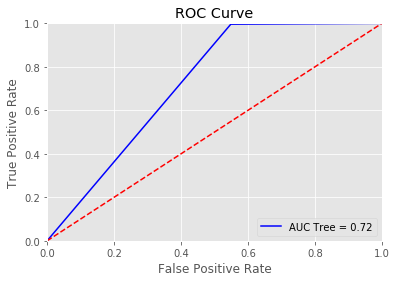

In [44]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b',
#label='AUC Logistic = %0.2f'% lauc)
#plt.plot(tfpr, ttpr, 'g',
label='AUC Tree = %0.2f'% tauc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

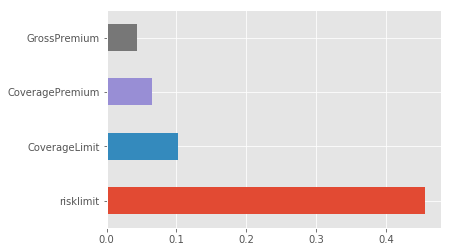

In [45]:
(pd.Series(clf.feature_importances_, index=xdf.columns)
   .nlargest(4)
   .plot(kind='barh'))

In [30]:
# Creating the random forest in the context of titanic using the randomforestclassifier.
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(max_features ="auto", oob_score=True, random_state=1, n_jobs=-1)
#param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], "n_estimators": [50, 100, 400, 700, 1000]}

#gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

#gs_fit = gs.fit(xdf_train, ydf_train)

rfc = RandomForestClassifier(bootstrap= True, max_features= 'auto', n_estimators= 200, criterion = 'gini')
# 
# rfc.fit(independent,df['Response'])

param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto','sqrt', 'log2'],
    'bootstrap':[True,False],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(rfc, param_grid, cv=5)
clf.fit(xdf_train,ydf_train)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vec

KeyboardInterrupt: 

In [ ]:
gs.best_score_

In [ ]:
gs.cv_results_.values()

In [ ]:
#print(gs.bestscore)
print(gs.best_params_)
#print(gs.cvresults)

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             min_samples_split=16,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(xdf_train, ydf_train)
rf.feature_importances_

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: 

In [ ]:
print("%.4f" % rf.oob_score_)

In [ ]:
rfdf_predictions = rf.predict(xdf_test)
rf_predictions = pd.DataFrame(rfdf_predictions, columns=['Bound'])

In [ ]:
cm_rf=confusion_matrix(ydf_test,rf_predictions)
print (cm_rf)

In [ ]:
TP = float(cm_rf[1,1])
FP = float(cm_rf[1,0])
FN = float(cm_rf[0,1])
TN = float(cm_rf[0,0])
rfPrecision = TP/(TP+FP)
rfRecall = TP/(TP+FN)
rfAccuracy = (TP+TN)/(TP+TN+FP+FN)
rfF1Score = (2*rfPrecision*rfRecall)/(rfPrecision+rfRecall)

In [ ]:
print("Precision ==>", rfPrecision)
print("Recall ==>", rfRecall)
print("Accuracy ==>", rfAccuracy)
print("F1score ==>", rfF1Score)

In [ ]:
from sklearn import metrics
rffpr, rftpr, thresholds = metrics.roc_curve(actuals, rf_predictions, pos_label=1)
rfauc = metrics.auc(rffpr, rftpr)
rfauc

In [ ]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b',
#label='AUC Logistic = %0.2f'% lauc)
#plt.plot(tfpr, ttpr, 'g',
label='AUC Tree = %0.2f'% tauc)
plt.plot(rffpr, rftpr, 'c',
label='AUC RF = %0.2f'% rfauc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [138]:
!pip install imblearn

Looking in indexes: https://repo.forge.lmig.com/api/pypi/python/simple


In [79]:
##Sampling by Tomeklinks##
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import ensemble
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


def data_generate(df,test_size=0.2,sampling_size = 4,sampling_type="Down_Sampling"):
    
    y = ydf
    X = xdf
    #y_binary = y.list(map(lambda x: 1 if x>0 else 0).tolist())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed,stratify = y)
    #y_train = X_train.df
    #X_train.drop(columns = "",inplace=True)
    #y_test = X_test.df
    #X_test.drop(columns = "",inplace=True)
    
    if sampling_type == "Down_Sampling":
        df1 = X_train
        #print(df1)
        df1["fire_size"]=y_train
        Event = df1[df1.Bound>0]
        No_Event=df1[df1.Bound==0]
        
        sampled_fire=No_event.sample(Event.shape[0]*sampling_size,random_state=seed)
        train_df=pd.concat([Event,sampled_fire],axis=0)
        train_df = train_df.sample(frac = 1, random_state= seed)
        y_train = train_df.fire_size.values
        X_train = train_df.drop(columns="fire_size")
    
      
    if sampling_type == "TomekLinks":
        
        Tm = TomekLinks(random_state=seed)
        X_train, y_train = Tm.fit_resample(X_train, y_train)

    #Randomize the data
    
    
    return X_train, X_test, y_train, y_test

In [ ]:
##Generate the training and test set##
seed = 50
data_generate(final_renewal_dataset,test_size=0.2,sampling_size = 4,sampling_type="TomekLinks")

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [355]:
def association_test(cat1,cat2):
    """
    Calculate the association test between two categorical sample. Here we have applied chi square contingency and t-test
    because w.l.g. these two test assumes rectangular contingency table.\
    Null hypothesis: There is no difference between the distributions
    
    Args:
    
        cat1: Category column 1
        cat2: Category column 2
        
    Returns:
    
        Tuple: ( chisquare test p value ,  t-test p value)
    """
    return [chi2_contingency(pd.crosstab(cat1,cat2))[1],ttest_ind(cat1,cat2)[1]]

In [356]:
colnames =['PolicyRegionName','Program','NewBusinessRenewalName','AttachmentTypeName','PolicyStateName','policyProductLinename','BrokerName','RiskDescription',
           'LineofBusinessName','IndustryName','CoverageName',
           'reassuredName']

p_values = [association_test(cat1 = policy['Bound'],cat2 = policy[k]) for k in colnames]
pvalues = pd.DataFrame(p_values,columns = ['Chisquare_Pvalue','t-test_Pvalue'])
pvalues.insert(0,'Attributes',colnames)

NameError: name 'chi2_contingency' is not defined

In [317]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(final_work_dataset.drop('Response',1),
#                                                      final_work_dataset['Response'], test_size=0.33, random_state=42)

# training_set = pd.concat([pd.DataFrame(y_train,columns = ['Response']),pd.DataFrame(X_train,columns = 
#                                                             final_work_dataset.columns.drop('Response'))],axis=1)
final_work_dataset = required_subset_model[['PolicyRegionName','Program','NewBusinessRenewalName','AttachmentTypeName','PolicyStateName','policyProductLinename','BrokerName','RiskDescription',
           'LineofBusinessName','IndustryName','CoverageName',
           'reassuredName','Bound']]

final_work_dataset_renewal = final_work_dataset[final_work_dataset.NewBusinessRenewalName == 'RENEWAL'] 
final_work_dataset_new = final_work_dataset[final_work_dataset.NewBusinessRenewalName == 'NEW BUSINESS']
# lists = ['weekdayBucket','Month','Quantity_Code','top_delay_customer_Ind','top_delay_terminal_Ind','top_delay_product_Ind']
# for each in lists:
#     ivtable = Info_Value(df,each,'Response')
#     if np.where(np.array(lists) == each)[0] == 0:
#         ivrecords = ivtable
#     else:
#         ivrecords = pd.concat([ivtable,ivrecords])
        
# ivrecords.to_csv("Ivtable.csv",index=False)
##For renewals##
keys = final_work_dataset_renewal.drop('Bound',1).apply( lambda x:"_".join(map(str,x.astype(object).tolist())),axis=1 )
final_work_dataset_renewal['keys'] = keys
count_target_per_combination = final_work_dataset_renewal.groupby('keys').sum()['Bound'].sort_values(ascending=False)
total_observations_per_combination = final_work_dataset_renewal.groupby('keys').count()['Bound'].sort_values(ascending=False)
count_0_per_combination = total_observations_per_combination - count_target_per_combination

Interaction_assessment_renewal = pd.concat([count_target_per_combination,total_observations_per_combination,count_0_per_combination],axis=1)
Interaction_assessment_renewal.columns = ['Count_Response','Count_Total','Count_0']
Interaction_assessment_renewal['Percentages'] = Interaction_assessment_renewal.Count_0 / Interaction_assessment_renewal.Count_Total.astype(float)*100
Interaction_assessment_renewal.sort_values(by = ['Percentages','Count_Total'],ascending = False,inplace=True)
Interaction_assessment_renewal['Percent_Observation_Covered'] = Interaction_assessment_renewal['Count_0'] / float(Interaction_assessment_renewal['Count_Total'].sum())*100
def splits(string):
    return string.split("_")
#keysdf = pd.DataFrame(map(splits,Interaction_assessment.index.values),columns = final_work_dataset.columns.drop(['Bound','keys']))
#Interaction_assessment_1 = pd.DataFrame(Interaction_assessment.index)
#Interaction_assessment = pd.concat([Interaction_assessment_1,Interaction_assessment],axis=1)
keysdf = pd.DataFrame(list(map(splits,Interaction_assessment_renewal.index.values.tolist())),columns = final_work_dataset_renewal.columns)
Interaction_assessment_renewal.index = keysdf.index
#Interaction_assessment_renewal = pd.concat([pd.DataFrame(keys.unique()),keysdf,Interaction_assessment_renewal],axis=1)
Interaction_assessment_renewal = pd.concat([keysdf,Interaction_assessment_renewal],axis=1)

##For new business##
keys = final_work_dataset_new.drop('Bound',1).apply( lambda x:"_".join(map(str,x.astype(object).tolist())),axis=1 )
final_work_dataset_new['keys'] = keys
count_target_per_combination = final_work_dataset_new.groupby('keys').sum()['Bound'].sort_values(ascending=False)
total_observations_per_combination = final_work_dataset_new.groupby('keys').count()['Bound'].sort_values(ascending=False)
count_0_per_combination = total_observations_per_combination - count_target_per_combination

Interaction_assessment_new = pd.concat([count_target_per_combination,total_observations_per_combination,count_0_per_combination],axis=1)
Interaction_assessment_new.columns = ['Count_Response','Count_Total','Count_0']
Interaction_assessment_new['Percentages'] = Interaction_assessment_new.Count_0 / Interaction_assessment_new.Count_Total.astype(float)*100
Interaction_assessment_new.sort_values(by = ['Percentages','Count_Total'],ascending = False,inplace=True)
Interaction_assessment_new['Percent_Observation_Covered'] = Interaction_assessment_new['Count_0'] / float(Interaction_assessment_new['Count_Total'].sum())*100


keysdf = pd.DataFrame(list(map(splits,Interaction_assessment_new.index.values.tolist())),columns = final_work_dataset_new.columns)
Interaction_assessment_new.index = keysdf.index
#Interaction_assessment_new = pd.concat([pd.DataFrame(keys.unique()),keysdf,Interaction_assessment_new],axis=1)
Interaction_assessment_new = pd.concat([keysdf,Interaction_assessment_new],axis=1)
#Interaction_assessment_renewal.to_csv("C:\\Users\\n0369076\\Desktop\\New Propensity data\\Interaction_assessment_renewal.csv",index=False)
#Interaction_assessment_new.to_csv("C:\\Users\\n0369076\\Desktop\\New Propensity data\\Interaction_assessment_new.csv",index=False)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

In [320]:
##For renewals##
keys = final_work_dataset_renewal.drop('Bound',1).apply( lambda x:"_".join(map(str,x.astype(object).tolist())),axis=1 )
final_work_dataset_renewal['keys'] = keys
count_target_per_combination = final_work_dataset_renewal.groupby('keys').sum()['Bound'].sort_values(ascending=False)
total_observations_per_combination = final_work_dataset_renewal.groupby('keys').count()['Bound'].sort_values(ascending=False)
count_0_per_combination = total_observations_per_combination - count_target_per_combination

Interaction_assessment_renewal = pd.concat([count_target_per_combination,total_observations_per_combination,count_0_per_combination],axis=1)
Interaction_assessment_renewal.columns = ['Count_Response','Count_Total','Count_0']
Interaction_assessment_renewal['Percentages'] = Interaction_assessment_renewal.Count_0 / Interaction_assessment_renewal.Count_Total.astype(float)*100
Interaction_assessment_renewal.sort_values(by = ['Percentages','Count_Total'],ascending = False,inplace=True)
Interaction_assessment_renewal['Percent_Observation_Covered'] = Interaction_assessment_renewal['Count_0'] / float(Interaction_assessment_renewal['Count_Total'].sum())*100

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [321]:
Interaction_assessment_renewal.index.values

array(['\nEurope_None_RENEWAL_EXCESS_Uk_CASUALTY_CRK COMMERCIAL INSURANCE SERVICES LIMITED_EXCESS_EXCESS XS GENERAL LIABILITY_PLUMBING  HEATING  AIR-CONDITIONING_ATTACHMENT POINT LIMIT_nan_\nEurope_None_RENEWAL_EXCESS_Uk_CASUALTY_CRK COMMERCIAL INSURANCE SERVICES LIMITED_EXCESS_EXCESS XS GENERAL LIABILITY_PLUMBING  HEATING  AIR-CONDITIONING_ATTACHMENT POINT LIMIT_nan',
       '\nEurope_None_RENEWAL_EXCESS_Uk_CASUALTY_CRK COMMERCIAL INSURANCE SERVICES LIMITED_EXCESS_EXCESS XS GENERAL LIABILITY_PLUMBING  HEATING  AIR-CONDITIONING_GENERAL LIABILITY_nan_\nEurope_None_RENEWAL_EXCESS_Uk_CASUALTY_CRK COMMERCIAL INSURANCE SERVICES LIMITED_EXCESS_EXCESS XS GENERAL LIABILITY_PLUMBING  HEATING  AIR-CONDITIONING_GENERAL LIABILITY_nan',
       '\nEurope_None_RENEWAL_PRIMARY_Netherlands_CASUALTY_DUPI ROTTERDAM BV_CGL_PRIMARY GENERAL LIABILITY_NONCLASSIFIABLE ESTABLISHMENTS_GENERAL LIABILITY_nan_\nEurope_None_RENEWAL_PRIMARY_Netherlands_CASUALTY_DUPI ROTTERDAM BV_CGL_PRIMARY GENERAL LIABILITY_NONCLAS

In [323]:
keys_df = pd.DataFrame(list(map(splits,Interaction_assessment_renewal.index.values.tolist())),columns = final_work_dataset_renewal.columns)
keys_df

AssertionError: 14 columns passed, passed data had 28 columns

In [318]:
Interaction_assessment_renewal.head(5)

,PolicyRegionName,Program,NewBusinessRenewalName,AttachmentTypeName,PolicyStateName,policyProductLinename,BrokerName,RiskDescription,LineofBusinessName,IndustryName,CoverageName,reassuredName,Bound,keys,Count_Response,Count_Total,Count_0,Percentages,Percent_Observation_Covered
0,\nEurope,None,RENEWAL,EXCESS,Uk,CASUALTY,CRK COMMERCIAL INSURANCE SERVICES LIMITED,EXCESS,EXCESS XS GENERAL LIABILITY,PLUMBING HEATING AIR-CONDITIONING,ATTACHMENT POINT LIMIT,nan,None,None,0,20,20,100.0,0.000748
1,\nEurope,None,RENEWAL,EXCESS,Uk,CASUALTY,CRK COMMERCIAL INSURANCE SERVICES LIMITED,EXCESS,EXCESS XS GENERAL LIABILITY,PLUMBING HEATING AIR-CONDITIONING,GENERAL LIABILITY,nan,None,None,0,20,20,100.0,0.000748
2,\nEurope,None,RENEWAL,PRIMARY,Netherlands,CASUALTY,DUPI ROTTERDAM BV,CGL,PRIMARY GENERAL LIABILITY,NONCLASSIFIABLE ESTABLISHMENTS,GENERAL LIABILITY,nan,None,None,0,9,9,100.0,0.000336
3,\nEurope,None,RENEWAL,PRIMARY,Netherlands,CASUALTY,DUPI ROTTERDAM BV,CGL,PRIMARY GENERAL LIABILITY,NONCLASSIFIABLE ESTABLISHMENTS,GS MINIMUM STANDARD PRICING,nan,None,None,0,9,9,100.0,0.000336
4,\nAsia,None,RENEWAL,PRIMARY,Malaysia,ENERGY,MPI GENERALI INSURANS BERHAD (MPI GENERALI),MALAYSIA,OIL & GAS,NONCLASSIFIABLE ESTABLISHMENTS,ATTACHMENT POINT LIMIT,MULT0147 MPI GENERALI INSURANS BERHAD,None,None,0,5,5,100.0,0.000187


In [303]:
Interaction_assessment_renewal.index.values

array(['\nEurope_None_RENEWAL_EXCESS_Uk_CASUALTY_CRK COMMERCIAL INSURANCE SERVICES LIMITED_EXCESS_EXCESS XS GENERAL LIABILITY_PLUMBING  HEATING  AIR-CONDITIONING_ATTACHMENT POINT LIMIT_nan',
       '\nEurope_None_RENEWAL_EXCESS_Uk_CASUALTY_CRK COMMERCIAL INSURANCE SERVICES LIMITED_EXCESS_EXCESS XS GENERAL LIABILITY_PLUMBING  HEATING  AIR-CONDITIONING_GENERAL LIABILITY_nan',
       '\nEurope_None_RENEWAL_PRIMARY_Netherlands_CASUALTY_DUPI ROTTERDAM BV_CGL_PRIMARY GENERAL LIABILITY_NONCLASSIFIABLE ESTABLISHMENTS_GENERAL LIABILITY_nan',
       ...,
       '\nOther/Unknown_VK HOWDEN DUAL MPL_RENEWAL_PRIMARY_Unknown_SPECIALTY CASUALTY_BEACH DUAL MASTER LMUK_SGD_SPC D&O PRIMARY OTHER LIAB_SERVICES  NEC_D&O LIMIT_nan',
       '\nOther/Unknown_VK HOWDEN DUAL MPL_RENEWAL_PRIMARY_Unknown_SPECIALTY CASUALTY_BEACH DUAL MASTER LMUK_USD_SPC D&O PRIMARY OTHER LIAB_SERVICES  NEC_ATTACHMENT POINT LIMIT_nan',
       '\nOther/Unknown_VK HOWDEN DUAL MPL_RENEWAL_PRIMARY_Unknown_SPECIALTY CASUALTY_BEACH DUAL

In [312]:
#Interaction_assessment = pd.read_csv('C:\\Users\\n0369076\\Desktop\\New Propensity data\\Interaction_assessment_.csv')
Interaction_assessment_renewal = Interaction_assessment_renewal[Interaction_assessment_renewal['Count_Total'] > 30]
Interaction_assessment_renewal = Interaction_assessment_renewal[(Interaction_assessment_renewal['Percentages'] > 35.0) |
                                               (Interaction_assessment_renewal['Percentages']) < 65.0]
Interaction_assessment_renewal['Samples_to_be_drawn'] = Interaction_assessment_renewal['Percent_Observation_Covered'] * 10000

Interaction_assessment_renewal['test_Samples_to_be_drawn'] = Interaction_assessment_renewal['Count_Total'] * 0.20
Interaction_assessment_renewal['test_Samples_to_be_drawn'] = Interaction_assessment_renewal['test_Samples_to_be_drawn'].astype(int)
Interaction_assessment_renewal['Samples_to_be_drawn'] =Interaction_assessment_renewal['Samples_to_be_drawn'].astype(int)
Interaction_assessment_renewal.reset_index(inplace=True)
iterators_renewal = Interaction_assessment_renewal[[0,'Samples_to_be_drawn','test_Samples_to_be_drawn']].values.tolist()

In [315]:
Interaction_assessment_renewal

,0,PolicyRegionName,Program,NewBusinessRenewalName,AttachmentTypeName,PolicyStateName,policyProductLinename,BrokerName,RiskDescription,LineofBusinessName,IndustryName,CoverageName,reassuredName,Bound,keys,Count_Response,Count_Total,Count_0,Percentages,Percent_Observation_Covered
0,\nAfrica_None_RENEWAL_EXCESS_South Africa_CASU...,\nEurope,None,RENEWAL,EXCESS,Uk,CASUALTY,CRK COMMERCIAL INSURANCE SERVICES LIMITED,EXCESS,EXCESS XS GENERAL LIABILITY,PLUMBING HEATING AIR-CONDITIONING,ATTACHMENT POINT LIMIT,nan,None,None,0,20,20,100.0,0.000748
1,\nAfrica_None_RENEWAL_EXCESS_South Africa_CASU...,\nEurope,None,RENEWAL,EXCESS,Uk,CASUALTY,CRK COMMERCIAL INSURANCE SERVICES LIMITED,EXCESS,EXCESS XS GENERAL LIABILITY,PLUMBING HEATING AIR-CONDITIONING,GENERAL LIABILITY,nan,None,None,0,20,20,100.0,0.000748
2,\nAfrica_None_RENEWAL_EXCESS_South Africa_CASU...,\nEurope,None,RENEWAL,PRIMARY,Netherlands,CASUALTY,DUPI ROTTERDAM BV,CGL,PRIMARY GENERAL LIABILITY,NONCLASSIFIABLE ESTABLISHMENTS,GENERAL LIABILITY,nan,None,None,0,9,9,100.0,0.000336
3,\nAfrica_None_RENEWAL_EXCESS_South Africa_CASU...,\nEurope,None,RENEWAL,PRIMARY,Netherlands,CASUALTY,DUPI ROTTERDAM BV,CGL,PRIMARY GENERAL LIABILITY,NONCLASSIFIABLE ESTABLISHMENTS,GS MINIMUM STANDARD PRICING,nan,None,None,0,9,9,100.0,0.000336
4,\nAfrica_None_RENEWAL_PRIMARY_South Africa_ENE...,\nAsia,None,RENEWAL,PRIMARY,Malaysia,ENERGY,MPI GENERALI INSURANS BERHAD (MPI GENERALI),MALAYSIA,OIL & GAS,NONCLASSIFIABLE ESTABLISHMENTS,ATTACHMENT POINT LIMIT,MULT0147 MPI GENERALI INSURANS BERHAD,None,None,0,5,5,100.0,0.000187
5,\nAfrica_None_RENEWAL_PRIMARY_South Africa_ENE...,\nAsia,None,RENEWAL,PRIMARY,Malaysia,ENERGY,MPI GENERALI INSURANS BERHAD (MPI GENERALI),MALAYSIA,OIL & GAS,NONCLASSIFIABLE ESTABLISHMENTS,COMBINED LOSS LIMIT,MULT0147 MPI GENERALI INSURANS BERHAD,None,None,0,5,5,100.0,0.000187
6,\nAfrica_None_RENEWAL_PRIMARY_South Africa_ENE...,\nAsia,None,RENEWAL,PRIMARY,Malaysia,ENERGY,MPI GENERALI INSURANS BERHAD (MPI GENERALI),MALAYSIA,OIL & GAS,NONCLASSIFIABLE ESTABLISHMENTS,PHYSICAL DAMAGE,MULT0147 MPI GENERALI INSURANS BERHAD,None,None,0,5,5,100.0,0.000187
7,\nAfrica_None_RENEWAL_PRIMARY_South Africa_ENE...,\nAsia,None,RENEWAL,PRIMARY,Malaysia,ENERGY,MPI GENERALI INSURANS BERHAD (MPI GENERALI),MALAYSIA,OIL & GAS,NONCLASSIFIABLE ESTABLISHMENTS,RISK MANAGEMENT FEE,MULT0147 MPI GENERALI INSURANS BERHAD,None,None,0,5,5,100.0,0.000187
8,\nAfrica_None_RENEWAL_PRIMARY_Mauritus_ENERGY_...,\nAsia,None,RENEWAL,PRIMARY,Malaysia,ENERGY,MPI GENERALI INSURANS BERHAD (MPI GENERALI),MALAYSIA,OIL & GAS,NONCLASSIFIABLE ESTABLISHMENTS,TOTAL PREMIUM,MULT0147 MPI GENERALI INSURANS BERHAD,None,None,0,5,5,100.0,0.000187
9,\nAfrica_None_RENEWAL_PRIMARY_Mauritus_ENERGY_...,\nEurope,None,RENEWAL,PRIMARY,Netherlands,OTHER,HAVELAAR EN VAN STOLK B.V.,UK,All Other Property,NONCLASSIFIABLE ESTABLISHMENTS,COMBINED LOSS LIMIT,nan,None,None,0,5,5,100.0,0.000187


In [268]:
Interaction_assessment_new = Interaction_assessment_new[Interaction_assessment_new['Count_Total'] > 10]
Interaction_assessment_new = Interaction_assessment_new[(Interaction_assessment_new['Percentages'] > 35.0) |
                                               (Interaction_assessment_new['Percentages']) < 65.0]
Interaction_assessment_new['Samples_to_be_drawn'] = Interaction_assessment_new['Percent_Observation_Covered'] * 10000

Interaction_assessment_new['test_Samples_to_be_drawn'] = Interaction_assessment_new['Count_Total'] * 0.20
Interaction_assessment_new['test_Samples_to_be_drawn'] = Interaction_assessment_new['test_Samples_to_be_drawn'].astype(int)
Interaction_assessment_new['Samples_to_be_drawn'] =Interaction_assessment_new['Samples_to_be_drawn'].astype(int)
Interaction_assessment_new.reset_index(inplace=True)
iterators_new = Interaction_assessment_new[[0,'Samples_to_be_drawn','test_Samples_to_be_drawn']].values.tolist()

In [270]:
len(iterators_new)

651

In [271]:
def Samples(key,data,trainnumber,testnumber):
    """
    """
    subset = data[data['keys'] == key]
    testSample = subset.sample(n = testnumber ,replace=False)
    remains = subset.drop(testSample.index)
    print(remains.shape)
    new_Samples = remains.sample(n = trainnumber,replace = True)
    return new_Samples,testSample


for k in range(0,len(iterators_new)):

    if k == 0:
        training_set_updated,testsetupdated = Samples(key = iterators_new[k][0],data = final_work_dataset_new,
                                                      trainnumber= iterators_new[k][1],testnumber = iterators_new[k][2])
    else:
        training_set_updated = pd.concat(
            [training_set_updated,Samples(key = iterators_new[k][0],data = final_work_dataset_new,
                                                      trainnumber= iterators_new[k][1],testnumber = iterators_new[k][2])[0]],axis=0
        )

        testsetupdated = pd.concat(
            [training_set_updated,Samples(key = iterators_new[k][0],data = final_work_dataset_new,
                                                      trainnumber= iterators_new[k][1],testnumber = iterators_new[k][2])[1]],axis=0
        )

ValueError: Cannot take a larger sample than population when 'replace=False'

In [95]:
training_set_updated.drop('keys',axis=1,inplace=True)
testsetupdated.drop('keys',axis=1,inplace=True)

In [96]:
training_set_updated.Bound.value_counts()

0    71009
Name: Bound, dtype: int64

In [274]:
# bins for target = 0
bins_for_one = Interaction_assessment_new[(Interaction_assessment_new.Percentages <= 0.35) & (Interaction_assessment_new.Count_Total >=20)]
bins_for_zero =  Interaction_assessment_new[(Interaction_assessment_new.Percentages >= 0.65) & (Interaction_assessment_new.Count_Total >=20)]
rows_for_zero = final_work_dataset_new.loc[final_work_dataset_new['keys'].isin(bins_for_zero[0].tolist())]
rows_for_one = final_work_dataset_new.loc[final_work_dataset_new['keys'].isin(bins_for_one[0].tolist())]

test_sample_for_one = rows_for_one.sample(frac = 0.2)
test_sample_for_zero = rows_for_zero.sample(frac = 0.2)


sample_one = rows_for_one.drop(test_sample_for_one.index)
sample_zero = rows_for_zero.drop(test_sample_for_zero.index).sample(n = sample_one.shape[0], replace = True)
training_undersample = pd.concat([sample_zero,rows_for_one]).sample(frac=1)
testing_undersample = pd.concat([test_sample_for_zero,test_sample_for_one]).sample(frac=1)



In [280]:
testing_undersample.Bound.value_counts()

1    123
0     23
Name: Bound, dtype: int64

In [282]:
training_undersample.to_csv('C:\\Users\\n0369076\\Desktop\\New Propensity data\\training_new.csv')
testing_undersample.to_csv('C:\\Users\\n0369076\\Desktop\\New Propensity data\\testing_new.csv')

In [279]:
rfc = RandomForestClassifier(bootstrap= True, max_features= 'auto', n_estimators= 200, criterion = 'gini')
# 
# rfc.fit(independent,df['Response'])

param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto','sqrt', 'log2'],
    'bootstrap':[True,False],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(rfc, param_grid, cv=5)
clf.fit(independent,training_undersample['Bound'])

NameError: name 'RandomForestClassifier' is not defined

In [37]:
pol1 = policy[policy["PolicyStatus"].isin(['Inforce New','Inforce Renewal','Renewed renewal']) | policy['PolicyStatus'].str.contains("Declination")]
pol1

,PolicyRegionName,PolicyNumber,PolicyWrittenDate,PolicyInceptionDate,PolicyExpiryDate,Program,NewBusinessRenewalName,AttachmentTypeName,PolicyStatus,PolicyStateName,...,RiAgreementTypeName,risklimit,CoverageLimit,DeductibleAmount1,FacultativeUnderwritingNotes,reassuredName,reassured Full Address,FiscalDateKey,RevenueAmountTypeName,GrossPremium
6,\nAsia,SIMCG18350503N,2018-02-14,2018-02-01,2019-02-01,None,NEW BUSINESS,PRIMARY,Inforce New,Bangladesh,...,UNKNOWN,"7,500,000.0000","7,500,000.0000","15,000.0000",NaN,PRIME INSURANCE COMPANY LTD,"Unique Heights, Level # 10, 117 Kazi Nazrul, I...","20,180,401.0000",Premium,"10,069.8100"
7,\nEurope,LOABMRPK001,2018-02-21,2018-02-21,2018-09-03,None,NEW BUSINESS,EXCESS,Inforce New,Uk,...,UNKNOWN,"5,000,000.0000","5,000,000.0000","2,500.0000",NaN,NaN,NaN,"20,180,401.0000",Tax,182.3700
8,\nEurope,LOABMRPK001,2018-02-21,2018-02-21,2018-09-03,None,NEW BUSINESS,EXCESS,Inforce New,Uk,...,UNKNOWN,"5,000,000.0000","5,000,000.0000","2,500.0000",NaN,NaN,NaN,"20,180,401.0000",Premium,"1,519.7100"
9,\nEurope,LOABMRPK001,2018-02-21,2018-02-21,2018-09-03,None,NEW BUSINESS,EXCESS,Inforce New,Uk,...,UNKNOWN,"5,000,000.0000","5,000,000.0000","2,500.0000",NaN,NaN,NaN,"20,180,401.0000",Tax,-182.3700
10,\nEurope,LOABMRPK001,2018-02-21,2018-02-21,2018-09-03,None,NEW BUSINESS,EXCESS,Inforce New,Uk,...,UNKNOWN,"5,000,000.0000","5,000,000.0000","2,500.0000",NaN,NaN,NaN,"20,180,401.0000",Premium,"-1,519.7100"
11,\nEurope,LOABMRPK001,2018-02-21,2018-02-21,2018-09-03,None,NEW BUSINESS,EXCESS,Inforce New,Uk,...,UNKNOWN,"5,000,000.0000","5,000,000.0000","2,500.0000",NaN,NaN,NaN,"20,180,401.0000",Tax,182.3700
12,\nEurope,LOABMRPK001,2018-02-21,2018-02-21,2018-09-03,None,NEW BUSINESS,EXCESS,Inforce New,Uk,...,UNKNOWN,"5,000,000.0000","5,000,000.0000","2,500.0000",NaN,NaN,NaN,"20,180,401.0000",Premium,"1,519.7100"
14,\nOceania,BNCAS17409988,2018-02-24,2018-02-24,2019-02-24,None,RENEWAL,PRIMARY,Inforce Renewal,Australia,...,UNKNOWN,"20,000,000.0000","5,000,000.0000","10,000.0000",NaN,NaN,NaN,"20,180,401.0000",Premium,"3,089.0000"
15,\nAfrica,LOABFYY2002,2018-02-03,2018-02-09,2019-02-09,None,RENEWAL,PRIMARY,Inforce Renewal,Kenya,...,UNKNOWN,"5,000,000.0000","5,000,000.0000",0.0000,NaN,MAYFAIR INSURANCE COMPANY LTD,"MAYFAIR CENTRE, 8TH FLOOR, RALPH BUNCHE ROAD, ...","20,180,401.0000",Premium,"9,500.0000"
19,\nAsia,SIMCG18350503N,2018-02-14,2018-02-01,2019-02-01,None,NEW BUSINESS,PRIMARY,Inforce New,Bangladesh,...,UNKNOWN,"7,500,000.0000","7,500,000.0000","15,000.0000",NaN,PRIME INSURANCE COMPANY LTD,"Unique Heights, Level # 10, 117 Kazi Nazrul, I...","20,180,401.0000",Commission,"-2,517.4500"


In [335]:
policy = CleanUp(policy)
policy.shape

MemoryError: 

In [336]:
uniqueregions = policy.PolicyRegionName.unique()
uniqueregions                            

array(['\nAfrica', '\nAmericas', '\nAsia', '\nEurope', '\nOceania',
       '\nOther/Unknown'], dtype=object)

In [337]:
(policy['FacultativeUnderwritingNotes'].isnull().sum()/policy.shape[0])*100

98.96163739001935

<function matplotlib.pyplot.show(*args, **kw)>

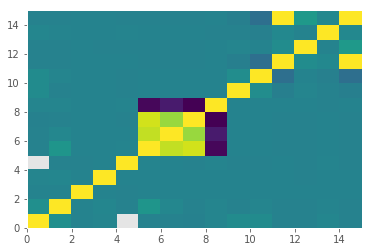

In [338]:
import matplotlib.pyplot as plt
plt.pcolor(policy.corr())
plt.show

In [339]:
pd.options.display.float_format = '{:,.4f}'.format
policy.corr()

,IndustryCode,risklimit,CoverageLimit,DeductibleAmount1,FacultativeAttachmentPoint,CoveragePremium,GrossPremium,Commission,Tax,Bound,year,month,day,Dayofweek,day_of_year
IndustryCode,1.0000,0.0856,0.0007,0.0151,nan,-0.0123,-0.0079,-0.0171,0.0139,0.0569,0.0589,-0.0037,-0.0122,0.0214,-0.0051
risklimit,0.0856,1.0000,0.0009,0.0238,-0.0140,0.1351,0.0262,-0.0058,0.0165,-0.0026,0.0162,-0.0030,-0.0099,0.0116,-0.0041
CoverageLimit,0.0007,0.0009,1.0000,0.0001,-0.0067,0.0001,0.0001,-0.0000,0.0000,-0.0001,-0.0009,0.0004,0.0007,-0.0001,0.0005
DeductibleAmount1,0.0151,0.0238,0.0001,1.0000,-0.0011,0.0007,0.0008,-0.0002,0.0001,-0.0013,0.0019,-0.0015,-0.0047,0.0014,-0.0019
FacultativeAttachmentPoint,nan,-0.0140,-0.0067,-0.0011,1.0000,0.0118,0.0032,-0.0029,0.0056,-0.0075,-0.0039,-0.0008,-0.0130,0.0072,-0.0024
CoveragePremium,-0.0123,0.1351,0.0001,0.0007,0.0118,1.0000,0.8340,0.8791,-0.7779,0.0001,0.0009,-0.0057,-0.0069,0.0046,-0.0063
GrossPremium,-0.0079,0.0262,0.0001,0.0008,0.0032,0.8340,1.0000,0.7179,-0.6795,-0.0018,0.0036,-0.0074,-0.0108,0.0048,-0.0084
Commission,-0.0171,-0.0058,-0.0000,-0.0002,-0.0029,0.8791,0.7179,1.0000,-0.8068,0.0000,-0.0016,-0.0033,-0.0023,0.0046,-0.0034
Tax,0.0139,0.0165,0.0000,0.0001,0.0056,-0.7779,-0.6795,-0.8068,1.0000,-0.0009,0.0013,0.0036,0.0043,-0.0031,0.0040
Bound,0.0569,-0.0026,-0.0001,-0.0013,-0.0075,0.0001,-0.0018,0.0000,-0.0009,1.0000,0.0737,-0.0325,0.0138,-0.0112,-0.0309


C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Program Files\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


43350567.69
-6049843.8


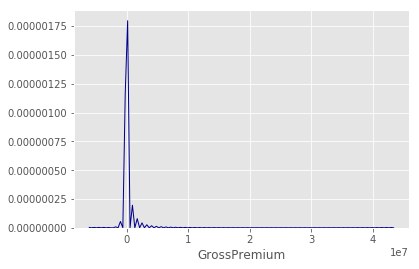

In [340]:
import seaborn as sns
sns.distplot(policy['GrossPremium'], hist=False, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
print(max(policy['GrossPremium']))
print(min(policy['GrossPremium']))

1534121293050.0
0.0


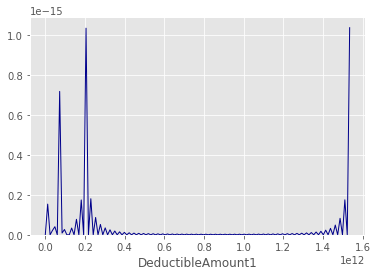

In [245]:
sns.distplot(policy['DeductibleAmount1'], hist=False, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

print(max(policy['DeductibleAmount1']))
print(min(policy['DeductibleAmount1']))

3257566511875.0
0.0


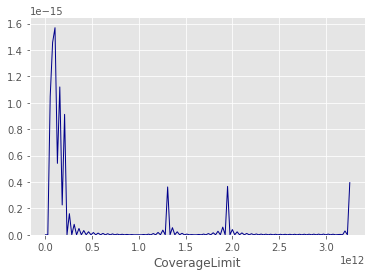

In [246]:
sns.distplot(policy['CoverageLimit'], hist=False, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
print(max(policy['CoverageLimit']))
print(min(policy['CoverageLimit']))

In [281]:
#sns.distplot(policy['risklimit'], hist=False, kde=True, 
#             bins=100, color = 'darkblue', 
#             hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 1})
print(max(policy['risklimit']))
print(min(policy['risklimit']))

TypeError: '>' not supported between instances of 'str' and 'float'

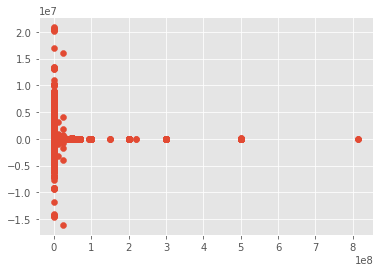

In [13]:
plt.scatter(policy['DeductibleAmount1'], policy['GrossPremium'] )

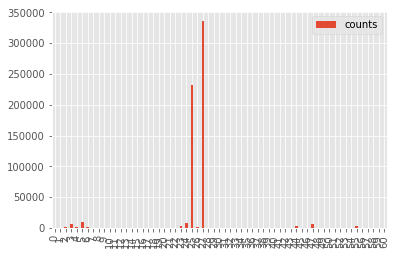

In [5]:
statusDf = policy.groupby(["PolicyStatus"]).size().reset_index(name="counts")
statusDf.plot.bar()
#statusDf.plot.bar(y = ["PolicyStatus"], x = "counts")

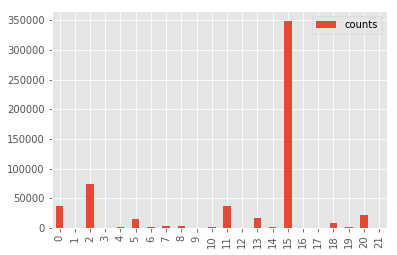

In [15]:
policy.groupby(["policyProductLinename"]).size().reset_index(name="counts").plot.bar()

In [16]:
policy.groupby(["policyProductLinename"]).size().reset_index(name="counts").sort_values(by = 'counts', ascending = False)

,policyProductLinename,counts
15,SPECIALTY CASUALTY,348528
2,CASUALTY,73762
0,ACCIDENT & HEALTH,37171
11,MARINE,37080
20,TRADE/POL RISKS,22735
13,OTHER,17512
5,ENERGY,14703
18,SURETY,7708
7,ENVIRONMENTAL IMPAIRMENT LIAB,3213
8,EQUINE,3064


In [17]:
policy.groupby(["policyProductLinename"]).agg({'GrossPremium': 'sum'}).sort_values(by = 'GrossPremium', ascending = False)

,GrossPremium
policyProductLinename,
SPECIALTY CASUALTY,"401,160,312.4300"
CASUALTY,"80,991,923.6500"
ACCIDENT & HEALTH,"45,754,778.7400"
ENERGY,"40,798,739.0000"
LEGAL INDEMNITY,"36,306,068.6400"
OTHER,"24,711,822.7800"
MARINE,"18,770,552.0700"
PECUNIARY LINES,"17,871,855.9700"
TRADE/POL RISKS,"15,379,394.3600"


In [8]:
statusDf['Proportion'] = statusDf['counts']/statusDf['counts'].sum()*100
statusDf.sort_values(by = ['counts'], ascending = False)
statusDf.to_csv("Policystatus.csv")

In [19]:
NewDf = policy[policy["PolicyStatus"] == 'Inforce New']
NewDf.shape

(232093, 37)

In [20]:
NewDf.corr()

,LineofBusinessCode,IndustryCode,risklimit,CoverageLimit,DeductibleAmount1,FiscalDateKey,GrossPremium
LineofBusinessCode,1.0000,-0.0337,-0.0004,0.0018,0.0339,-0.1085,0.0002
IndustryCode,-0.0337,1.0000,0.0134,0.0142,0.0366,0.0203,-0.0083
risklimit,-0.0004,0.0134,1.0000,0.2144,0.0233,0.0219,-0.0001
CoverageLimit,0.0018,0.0142,0.2144,1.0000,0.0418,0.0009,-0.0001
DeductibleAmount1,0.0339,0.0366,0.0233,0.0418,1.0000,0.0849,-0.0002
FiscalDateKey,-0.1085,0.0203,0.0219,0.0009,0.0849,1.0000,0.0002
GrossPremium,0.0002,-0.0083,-0.0001,-0.0001,-0.0002,0.0002,1.0000


In [21]:
NewDf.dtypes

PolicyRegionName                        object
PolicyNumber                            object
PolicyWrittenDate               datetime64[ns]
PolicyInceptionDate             datetime64[ns]
PolicyExpiryDate                datetime64[ns]
Program                                 object
NewBusinessRenewalName                  object
AttachmentTypeName                      object
PolicyStatus                            object
PolicyStateName                         object
policyProductLinename                   object
InsuredName                             object
Insured Full Address                    object
Broker Group                            object
Main Broker                             object
BrokerName                              object
Broker Full Address                     object
risknumber                              object
RiskDescription                         object
ProfitCenterCode                        object
LineofBusinessCode                     float64
LineofBusines

In [22]:
(NewDf['FacultativeUnderwritingNotes'].isnull().sum()/NewDf.shape[0])*100

99.16111214039199

In [23]:
NewDf['PolicyExpiryDate'] = NewDf['PolicyExpiryDate'].astype('datetime64[ns]')

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


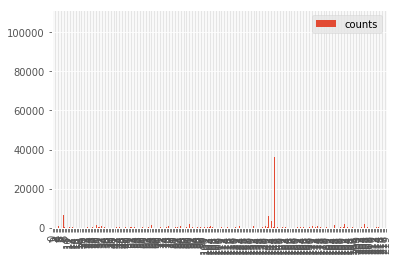

In [24]:
IndDf = NewDf.groupby(["IndustryName"]).size().reset_index(name="counts")
IndDf.plot.bar()

In [52]:
IndDf.sort_values(by = ['counts'], ascending=False)

,IndustryName,counts
105,NONCLASSIFIABLE ESTABLISHMENTS,519707
157,TELEPHONE & TELEGRAPH APPARATUS,127408
9,APARTMENT BUILDING OPERATORS,14671
61,"FRUITS & TREE NUTS, NEC",9728
112,"OFFICES OF HEALTH PRACTITIONERS, NEC",5779
36,CRUDE PETROLEUM & NATURAL GAS,3761
98,MOTION PICTURE & VIDEO PRODUCTION,3708
109,OFFICES & CLINICS OF CHIROPRACTORS,3246
173,"WATER, SEWER & UTILITY LINES",2881
47,"DWELLING OPERATORS, EXCEPT APARTMENTS",2508


In [59]:
IndGrp = policy.groupby(["IndustryName"]).size().reset_index(name="counts").sort_values(by = ['counts'], ascending=False)
IndGrp['prop'] = IndGrp['counts']/IndGrp['counts'].sum()*100
IndGrp['prop'][0:7].sum()

91.48399195497548

In [73]:
pd.options.display.float_format = '{:,.2f}'.format
GWP_IndDf = policy.groupby(["IndustryName"]).agg({'GrossPremium': 'sum'})
GWP_IndDf['Proportion'] = GWP_IndDf['GrossPremium']/GWP_IndDf['GrossPremium'].sum()*100
GWP_IndDf.sort_values(by = ["GrossPremium"], ascending = False)

,GrossPremium,Proportion
IndustryName,,
NONCLASSIFIABLE ESTABLISHMENTS,"5,285,137,204.58",51.44
TELEPHONE & TELEGRAPH APPARATUS,"4,479,209,631.52",43.60
APARTMENT BUILDING OPERATORS,"47,413,391.99",0.46
NATIONAL COMMERCIAL BANKS,"39,267,995.83",0.38
CATERERS & BANQUET HALLS,"37,550,711.38",0.37
ENGINEERING SERVICES,"19,809,325.71",0.19
"BUILDING MAINTENANCE SERVICES, NEC","19,192,999.68",0.19
CEMETERY SUBDIVIDERS & DEVELOPERS,"18,810,967.84",0.18
"NONRESIDENTIAL CONSTRUCTION, NEC","18,389,725.28",0.18


In [71]:
GWP_IndDf.dtypes

GrossPremium    float64
dtype: object

In [76]:
NewDf['PolicyInceptionDate'].max(), NewDf['PolicyInceptionDate'].min()

(Timestamp('2018-09-23 00:00:00'), Timestamp('2008-04-07 00:00:00'))

In [77]:
NewDf.groupby(["NewBusinessRenewalName"]).size().reset_index(name="counts")

,NewBusinessRenewalName,counts
0,NEW BUSINESS,716310
1,RENEWAL,3651


In [86]:
policy[policy["GrossPremium"] == 0].shape

(6692, 30)

In [7]:
import pandas as pd
import math
import os
import numpy as np
#from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
#from sklearn import cross_validation,metrics
from scipy.stats import ttest_ind,chi2_contingency

%matplotlib inline

In [23]:
def Info_Value(data,column,Response):
    """
    Extract information value and Log odds wrt categorical data for binary classification analysis.
    
    Args:
    
    data: dataset with independent and Target
    column: Name of the independent column for which we want to calculate IV
    Response: Response name
    
    Returns:
    
    Data frame with columns IV, Log_odds and Target percentage for each bukcet of chosen column.
    """
    Response_count = data.groupby(column).sum()[Response]
    p1 = Response_count / float(data.shape[0]) + 0.001
    p0 = 1 - p1 + 0.001
    log_odds = map(math.log,p1/p0)
    woe = [a*b for (a,b) in zip((p1 - p0),log_odds)]
    returndf = pd.DataFrame(data[column].unique(),columns = ['Attribute_Bukcet'])
    returndf['IV'] = np.array(woe)
    returndf['Log_odds'] = np.array(log_odds)
    returndf.insert(0,'Attribute_Name',column)
    returndf['Percentage_1'] =np.array(p1)
    return returndf

In [25]:
colnames = ['Program','AttachmentTypeName','PolicyStateName','policyProductLinename','BrokerName','RiskDescription',
           'LineofBusinessCode','IndustryCode','CoverageCode','TreatyFacIndicatorName','RiAgreementTypeName'
           'reassuredName']
info_values = [Info_Value(data = policy,column = policy[k],Response = policy['Bound']) for k in colnames]
#pvalues = pd.DataFrame(p_values,columns = ['Chisquare_Pvalue','t-test_Pvalue'])
#pvalues.insert(0,'Attributes',colnames)

KeyError: '[1 1 1 ... 0 0 0] not in index'

In [ ]:
def Balance_data_simple_oversampling(data,Response,ratio = '60:40',obs_total = 100000):
    """
    Performs simple oversampling (can be replaced by imblearn package)
    
    Args:
    
    data: dataset with independent and Target
    Response: Response name
    Ratio: Desired 0-1 ratio
    obs_total: total samples required
    
    Returns:
    
    Dataset with desired 0-1 ratio,
    """
    ratio_o = float(ratio.split(":")[0])
    ratio_1 = float(ratio.split(":")[1])
    samples_from_0 = np.random.choice(data[data[Response] == 0].index.values,int(obs_total*ratio_o/100),True)
    samples_from_1 = np.random.choice(data[data[Response] == 1].index.values,int(obs_total*ratio_1/100),True)
    oversamples = pd.concat([data.loc[samples_from_0],data.loc[samples_from_1]])
    oversamples.index = range(0,oversamples.shape[0])
    return oversamples

In [8]:
def association_test(cat1,cat2):
    """
    Calculate the association test between two categorical sample. Here we have applied chi square contingency and t-test
    because w.l.g. these two test assumes rectangular contingency table.\
    Null hypothesis: There is no difference between the distributions
    
    Args:
    
        cat1: Category column 1
        cat2: Category column 2
        
    Returns:
    
        Tuple: ( chisquare test p value ,  t-test p value)
    """
    return [chi2_contingency(pd.crosstab(cat1,cat2))[1],ttest_ind(cat1,cat2)[1]]

In [ ]:
required_subset['customer_terminal_interaction'] = required_subset.top_delay_terminal_Ind.astype(str).str.cat(required_subset.top_delay_customer_Ind.astype(str), sep='_')
required_subset['product_terminal_interaction'] = required_subset.top_delay_terminal_Ind.astype(str).str.cat(required_subset.top_delay_product_Ind.astype(str), sep='_')

In [5]:
list(policy)

['PolicyRegionName',
 'PolicyNumber',
 'PolicyWrittenDate',
 'PolicyInceptionDate',
 'PolicyExpiryDate',
 'Program',
 'NewBusinessRenewalName',
 'AttachmentTypeName',
 'PolicyStatus',
 'PolicyStateName',
 'policyProductLinename',
 'InsuredName',
 'Insured Full Address',
 'Broker Group',
 'Main Broker',
 'BrokerName',
 'Broker Full Address',
 'risknumber',
 'RiskDescription',
 'ProfitCenterCode',
 'LineofBusinessCode',
 'LineofBusinessName',
 'IndustryCode',
 'IndustryName',
 'CoverageCode',
 'CoverageName',
 'TreatyFacIndicatorName',
 'RiAgreementTypeName',
 'risklimit',
 'CoverageLimit',
 'DeductibleAmount1',
 'FacultativeUnderwritingNotes',
 'reassuredName',
 'reassured Full Address',
 'FiscalDateKey',
 'RevenueAmountTypeName',
 'GrossPremium']

In [ ]:
colnames = ['Program','AttachmentTypeName','PolicyStateName','policyProductLinename','BrokerName','RiskDescription',
           'LineofBusinessCode','IndustryCode','CoverageCode','TreatyFacIndicatorName','RiAgreementTypeName'
           'reassuredName']
p_values = [association_test(cat1 = policy['PolicyStatus'],cat2 = policy[k]) for k in colnames]
pvalues = pd.DataFrame(p_values,columns = ['Chisquare_Pvalue','t-test_Pvalue'])
pvalues.insert(0,'Attributes',colnames)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(final_work_dataset.drop('Response',1),
#                                                      final_work_dataset['Response'], test_size=0.33, random_state=42)

# training_set = pd.concat([pd.DataFrame(y_train,columns = ['Response']),pd.DataFrame(X_train,columns = 
#                                                             final_work_dataset.columns.drop('Response'))],axis=1)
final_work_dataset = required_subset[['Response','TERMINAL_NAME','weekdayBucket','seasonal_calender','Quantity_Code','top_delay_customer_Ind','top_delay_terminal_Ind','top_delay_product_Ind',
                                     'Trip_bucket','Load_time_Frames']]
# lists = ['weekdayBucket','Month','Quantity_Code','top_delay_customer_Ind','top_delay_terminal_Ind','top_delay_product_Ind']
# for each in lists:
#     ivtable = Info_Value(df,each,'Response')
#     if np.where(np.array(lists) == each)[0] == 0:
#         ivrecords = ivtable
#     else:
#         ivrecords = pd.concat([ivtable,ivrecords])
        
# ivrecords.to_csv("Ivtable.csv",index=False)
keys = final_work_dataset.drop('Response',1).apply( lambda x:"_".join(map(str,x.astype(object).tolist())),axis=1 )
final_work_dataset['keys'] = keys
count_target_per_combination = final_work_dataset.groupby('keys').sum()['Response'].sort_values(ascending=False)
total_observations_per_combination = final_work_dataset.groupby('keys').count()['Response'].sort_values(ascending=False)

Interaction_assessment = pd.concat([count_target_per_combination,total_observations_per_combination],axis=1)
Interaction_assessment.columns = ['Count_Response','Count_Total']
Interaction_assessment['Percentages'] = Interaction_assessment.Count_Response / Interaction_assessment.Count_Total.astype(float)
Interaction_assessment.sort_values(by = ['Percentages','Count_Total'],ascending = False,inplace=True)
Interaction_assessment['Percent_Observation_Covered'] = Interaction_assessment['Count_Total'] / float(Interaction_assessment['Count_Total'].sum())
def splits(string):
    return string.split("_")
keysdf = pd.DataFrame(map(splits,Interaction_assessment.index.values),columns = final_work_dataset.columns.drop(['Response','keys']))
Interaction_assessment.index = keysdf.index
Interaction_assessment = pd.concat([keysdf,Interaction_assessment],axis=1)
Interaction_assessment.to_csv("Interaction_assessment_.csv",index=False)

In [ ]:
def extract_interaction(df, tuples,ResponseName):
    """
    Extract response percentage as per availble two possible combinations.
    
    Args:
    
        df: dataframe with independent attributes and target
        tuples: Which combination tuple we need to check (e.g. ('weekdayBucket', 'seasonal_calender'))
        ResponseName: Name of the target variable
        
    Returns:
    
        Dataframe: columns: Attributes, Interaction, Target Percentage count, Total Observation count
        
    """

    df.index = xrange(df.shape[0])
    cols = list(tuples)
    new_key = df[cols].apply( lambda x:"_".join(map(str,x.astype(object).tolist())),axis=1 )
    subdf = pd.concat([df[ResponseName],new_key],axis=1)
    Interact_check = pd.DataFrame(subdf.groupby(0).sum()[ResponseName] / subdf.groupby(0).count()[ResponseName].astype(float))
    Interact_check.reset_index(inplace=True)
    Interact_check.columns = ['Key','PercentageTarget']
    Interact_check['Total'] = np.array(subdf.groupby(0).count()[ResponseName].astype(float))
    Interact_check.insert(0,'Attributes',np.repeat("-".join(list(tuples)),len(np.unique(new_key))))
    return Interact_check


In [ ]:
idx =  0
for k in combs:
    interactiondf = extract_interaction(df = df, tuples = k,ResponseName = 'Response')
    if idx == 0:
        Records_Interaction = interactiondf
    else:
        Records_Interaction = pd.concat([Records_Interaction, interactiondf])
    idx+=1   

In [ ]:
Interaction_assessment = Interaction_assessment[Interaction_assessment['Count_Total'] > 30]
Interaction_assessment = Interaction_assessment[(Interaction_assessment['Percentages'] < .35) |
                                               (Interaction_assessment['Percentages']) > 0.65]
Interaction_assessment['Samples_to_be_drawn'] = Interaction_assessment['Percent_Observation_Covered'] * 1000000

Interaction_assessment['test_Samples_to_be_drawn'] = Interaction_assessment['Count_Total'] * 0.20
Interaction_assessment['test_Samples_to_be_drawn'] = Interaction_assessment['test_Samples_to_be_drawn'].astype(int)
Interaction_assessment['Samples_to_be_drawn'] =Interaction_assessment['Samples_to_be_drawn'].astype(int)
Interaction_assessment.reset_index(inplace=True)
iterators_ = Interaction_assessment[['index','Samples_to_be_drawn','test_Samples_to_be_drawn']].values.tolist()

In [ ]:
iterators_[:5]

In [ ]:
def Samples(key,data,trainnumber,testnumber):
    """
    """
    subset = data[data['keys'] == key]
    testSample = subset.sample(n = testnumber,replace=False)
    remains = subset.drop(testSample.index)
    new_Samples = remains.sample(n = trainnumber,replace = True)
    return new_Samples,testSample


for k in range(0,len(iterators_)):

    if k == 0:
        training_set_updated,testsetupdated = Samples(key = iterators_[k][0],data = final_work_dataset,
                                                      trainnumber= iterators_[k][1],testnumber = iterators_[k][2])
    else:
        training_set_updated = pd.concat(
            [training_set_updated,Samples(key = iterators_[k][0],data = final_work_dataset,
                                                      trainnumber= iterators_[k][1],testnumber = iterators_[k][2])[0]],axis=0
        )

        testsetupdated = pd.concat(
            [training_set_updated,Samples(key = iterators_[k][0],data = final_work_dataset,
                                                      trainnumber= iterators_[k][1],testnumber = iterators_[k][2])[1]],axis=0
        )

In [ ]:
training_set_updated.drop('keys',axis=1,inplace=True)
testsetupdated.drop('keys',axis=1,inplace=True)

In [ ]:
training_set_updated.Response.value_counts()

In [ ]:
# bins for target = 0
bins_for_zero = Interaction_assessment[(Interaction_assessment.Percentages <= 0.35) & (Interaction_assessment.Count_Total >=20)]
bins_for_one =  Interaction_assessment[(Interaction_assessment.Percentages >= 0.65) & (Interaction_assessment.Count_Total >=20)]
rows_for_zero = final_work_dataset.loc[final_work_dataset['keys'].isin(bins_for_zero['index'].tolist())]
rows_for_one = final_work_dataset.loc[final_work_dataset['keys'].isin(bins_for_one['index'].tolist())]

test_sample_for_one = rows_for_one.sample(frac = 0.2)
test_sample_for_zero = rows_for_zero.sample(frac = 0.2)


sample_one = rows_for_one.drop(test_sample_for_one.index)
sample_zero = rows_for_zero.drop(test_sample_for_zero.index).sample(n = sample_one.shape[0], replace = False)
training_undersample = pd.concat([sample_zero,rows_for_one]).sample(frac=1)
testing_undersample = pd.concat([test_sample_for_zero,test_sample_for_one]).sample(frac=1)

In [ ]:
lists_=[u'weekdayBucket', u'seasonal_calender', u'Quantity_Code',u'top_delay_customer_Ind', u'top_delay_terminal_Ind',u'top_delay_product_Ind',
       'Trip_bucket','Load_time_Frames']

for k in xrange(len(lists_)):
    if k == 0:
        independent_undersample = pd.get_dummies(training_undersample[lists_[k]].astype('category'))
        independent_undersample.index = training_undersample.index
        independent_undersample.columns = [lists_[k]+"_bucket_"+str(each) for each in xrange(independent_undersample.shape[1])]
    else:
        cat = pd.get_dummies(training_undersample[lists_[k]].astype('category'))
        cat.index = training_undersample.index
        cat.columns = [lists_[k]+"_bucket_"+str(each) for each in cat.columns]
        independent_undersample = pd.concat([independent_undersample,cat],axis=1)
response_train_undersample = training_undersample['Response']


for k in xrange(len(lists_)):
    if k == 0:
        independent_undersample_test = pd.get_dummies(testing_undersample[lists_[k]].astype('category'))
        independent_undersample_test.index = testing_undersample.index
        independent_undersample_test.columns = [lists_[k]+"_bucket_"+str(each) for each in xrange(independent_undersample_test.shape[1])]
    else:
        cat = pd.get_dummies(testing_undersample[lists_[k]].astype('category'))
        cat.index = testing_undersample.index
        cat.columns = [lists_[k]+"_bucket_"+str(each) for each in cat.columns]
        independent_undersample_test = pd.concat([independent_undersample_test,cat],axis=1)
response_test_undersample = testing_undersample['Response']

In [ ]:
df = Balance_data_simple_oversampling(data = training_set_updated,Response = 'Response',ratio = '60:40',obs_total = 100000)

lists_=[u'weekdayBucket', u'seasonal_calender', u'Quantity_Code',u'top_delay_customer_Ind', u'top_delay_terminal_Ind',u'top_delay_product_Ind',
       'Trip_bucket','Load_time_Frames']

for k in xrange(len(lists_)):
    if k == 0:
        independent = pd.get_dummies(df[lists_[k]].astype('category'))
        independent.index = df.index
        independent.columns = [lists_[k]+"_bucket_"+str(each) for each in independent.columns]
    else:
        cat = pd.get_dummies(df[lists_[k]].astype('category'))
        cat.index = independent.index
        cat.columns = [lists_[k]+"_bucket_"+str(each) for each in cat.columns]
        independent = pd.concat([independent,cat],axis=1)

testdata =testsetupdated.drop(['Response'],axis=1)

for k in xrange(len(lists_)):
    if k == 0:
        independent_test = pd.get_dummies(testdata[lists_[k]].astype('category'))
        independent_test.index = testdata.index
        independent_test.columns = [lists_[k]+"_bucket_"+str(each) for each in independent_test.columns]
    else:
        cat = pd.get_dummies(testdata[lists_[k]].astype('category'))
        cat.index = independent_test.index
        cat.columns = [lists_[k]+"_bucket_"+str(each) for each in cat.columns]
        independent_test = pd.concat([independent_test,cat],axis=1)



independent_test['Response'] = testsetupdated['Response']

In [ ]:
rfc = RandomForestClassifier(bootstrap= True, max_features= 'auto', n_estimators= 200, criterion = 'gini')
# 
# rfc.fit(independent,df['Response'])

param_grid = { 
    'n_estimators': [50,100,200,300],
    'max_features': ['auto','sqrt', 'log2'],
    'bootstrap':[True,False],
    'criterion' : ['gini','entropy']
}
clf = GridSearchCV(rfc, param_grid, cv=5)
clf.fit(independent,df['Response'])


In [ ]:
confusion_matrix(testsetupdated['Response'],rfc.predict(independent_test.drop('Response',1)))

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = rfc.predict_proba(independent_test.drop('Response',1))
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(testsetupdated['Response'], preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
ROC_table = pd.DataFrame(np.vstack((fpr,tpr))).transpose()
ROC_table.columns=['False Positive Rate','True Positive Rate']
ROC_table.to_csv("ROC_table.csv",index=False)

In [ ]:
pd.DataFrame(np.transpose(np.vstack((independent_test.columns.drop('Response'),rfc.feature_importances_))),
             columns = ['AttributeName','Feature Importance']).round(3).to_csv("FeatureImportance.csv",index=False)

In [ ]:
def precision_recall_extract(model,data,ResponseName= 'Response',cutoff = 0.784):
    """
    Extract precision and recall using scikit learn library
    
    Args:
    
    data: dataset with independent and Target
    Response: Response name
    model: Fitted model which we want to validate
    cutoff: cut off points
    
    Returns:
    
    Dataset with desired 0-1 ratio,
    
    """
    predicted_probability = model.predict_proba(data.drop(ResponseName,1))
    predicted_reponse = np.repeat(0,predicted_probability.shape[0])
    predicted_reponse[np.where(predicted_probability > cutoff)[0]] = 1
    tuples = precision_recall_fscore_support(data[ResponseName], predicted_reponse, average='macro')
    return cutoff, tuples[0],tuples[1]

scores = [precision_recall_extract(model = rfc,data = testdata,ResponseName= 'Response',cutoff = float(k)/100) for k in range(1,100)]

In [ ]:
metrics.roc_auc_score(y_test,rfc.predict_proba(testdata.drop('Response',1))[:,1])

In [ ]:
lists = df.columns.drop(['Response','keys'])
def modelfit(alg, train, predictors, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train[predictors], train['Response'])
        
    #Predict training set:
    train_predictions = alg.predict(train[predictors])
    train_predprob = alg.predict_proba(train[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, train[predictors], train['Response'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "AUC Score (Train): %f" % metrics.roc_auc_score(train['Response'], train_predprob)
    return alg

In [ ]:
gbm = modelfit(GradientBoostingClassifier(random_state=10), train = df, predictors = lists, performCV=True, cv_folds=5)

In [ ]:
confusion_matrix(y_test,gbm.predict(testdata.drop('Response',1)))

In [ ]:
metrics.roc_auc_score(y_test,gbm.predict_proba(testdata.drop('Response',1))[:,1])